# Aim:Temperature Forecast using Machine Learning. 

#### Problem Statement:

Predicting the weather based on past data and checking the variations with the true values.  

The data for this is taken from UCI ml repo.  

##### Import all the required library 

In [3]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [5]:
data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")

In [6]:
data.head(10)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   
5      6.0  30-06-2013          31.9          23.5    52.437126    85.307251   
6      7.0  30-06-2013          31.4          24.4    56.287189    81.019760   
7      8.0  30-06-2013          32.1          23.6    52.326218    78.004539   
8      9.0  30-06-2013          31.4          22.0    55.338791    80.784607   
9     10.0  30-06-2013          31.6          20.5    56.651203    86.849632   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   
5         29.219342         23.822613  6.182295   50.231389   0.185279   
6         28.551859         24.238467  5.587135  125.110007   0.389600   
7         28.851982         23.819054  6.104417   42.011547   0.357856   
8         28.426975         23.332373  6.017135   85.110971   0.408766   
9         27.576705         22.527018  6.518841   63.006075   0.348292   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   
5   0.280818   0.232841   0.146363         0.0         0.0         0.0   
6   0.333570   0.270419   0.145705         0.0         0.0         0.0   
7   0.344928   0.272387   0.143841         0.0         0.0         0.0   
8   0.344800   0.264980   0.148911         0.0         0.0         0.0   
9   0.306255   0.245254   0.135443         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   
5         0.0  37.5102  127.042   54.6384  0.1457      5873.780762       31.5   
6         0.0  37.5776  126.838   12.3700  0.0985      5849.233398       30.9   
7         0.0  37.4697  126.910   52.5180  1.5629      5863.992188       31.1   
8         0.0  37.4967  126.826   50.9312  0.4125      5876.901367       31.3   
9         0.0  37.4562  126.955  208.5070  5.1782      5893.608398       30.5   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5  
5       24.0  
6       23.4  
7       22.9  
8       21.6  
9       21.0

In [7]:
data.tail(10)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7742     18.0  30-08-2017          23.3          18.2    30.259682   
7743     19.0  30-08-2017          22.6          15.0    25.536045   
7744     20.0  30-08-2017          22.7          15.9    38.216373   
7745     21.0  30-08-2017          23.1          17.8    24.688997   
7746     22.0  30-08-2017          22.5          17.4    30.094858   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7742    86.565193         26.474403         17.289157   6.522731   94.203783   
7743    78.779045         26.596280         17.856040   6.905963   54.030075   
7744    94.428116         24.037222         15.772677   6.478060  112.580310   
7745    78.261383         27.812697         18.303014   6.603253    9.614074   
7746    83.690018         26.704905         17.814038   5.768083   82.146707   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      LDAPS_CC1  LDAPS_CC2     LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
7742   0.045451   0.034340  0.000000e+00   0.014070    0.000000    0.000000   
7743   0.056634   0.076289  0.000000e+00   0.000000    0.000000    0.000000   
7744   0.038019   0.005380  0.000000e+00   0.000938    0.000000    0.000000   
7745   0.052902   0.030169  0.000000e+00   0.004380    0.000000    0.000000   
7746   0.066461   0.024518  5.850000e-07   0.017678    0.000000    0.000000   
7747   0.030034   0.081035  0.000000e+00   0.000000    0.000000    0.000000   
7748   0.035874   0.074962  0.000000e+00   0.000000    0.000000    0.000000   
7749   0.048954   0.059869  0.000000e+00   0.000796    0.000000    0.000000   
7750   0.000000   0.000000  0.000000e+00   0.000000    0.000000    0.000000   
7751   0.967277   0.968353  9.837888e-01   0.974710   23.701544   21.621661   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
7742    0.000000    0.000000  37.4832  127.024   56.4448  1.231300   
7743    0.000000    0.000000  37.5776  126.938   75.0924  1.767800   
7744    0.000000    0.000000  37.6181  127.004  146.5540  4.729600   
7745    0.000000    0.000000  37.5507  127.040   26.2980  0.572100   
7746    0.000000    0.000000  37.5102  127.086   21.9668  0.133200   
7747    0.000000    0.000000  37.5372  126.891   15.5876  0.155400   
7748    0.000000    0.000000  37.5237  126.909   17.2956  0.222300   
7749    0.000000    0.000000  37.5237  126.970   19.5844  0.271300   
7750    0.000000    0.000000  37.4562  126.826   12.3700  0.098475   
7751   15.841235   16.655469  37.6450  127.135  212.3350  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
7742      4435.611816       27.8       16.7  
7743      4495.473633       27.1       16.6  
7744      4554.965332       26.7       16.3  
7745      4456.024414       27.6       17.7  
7746      4441.803711       28.0       17.1  
7747      4443.313965       28.3       18.1  
7748      4438.373535       28.6       18.8  
7749      4451.345215       27.8       17.4  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8

the given dataset conatins 7052 rows and  25 columns

the dataset contains numerical data only.

# EXPLORATORY DATA ANALYSIS (EDA)

In [10]:
data.shape

(7752, 25)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


#### Data Information:
Target Columns :  Next_Tmax  and  Next_Tmin    
Data haviing 7752 entries, 0 to 7751    
Dataset having 25 columns and 7752 Rows    
We have 24 float type columns and 1 object   
Few columns also having null values    
Data memory usage 1.5+ MB   

Lets check the null values present in the data. 

In [11]:
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

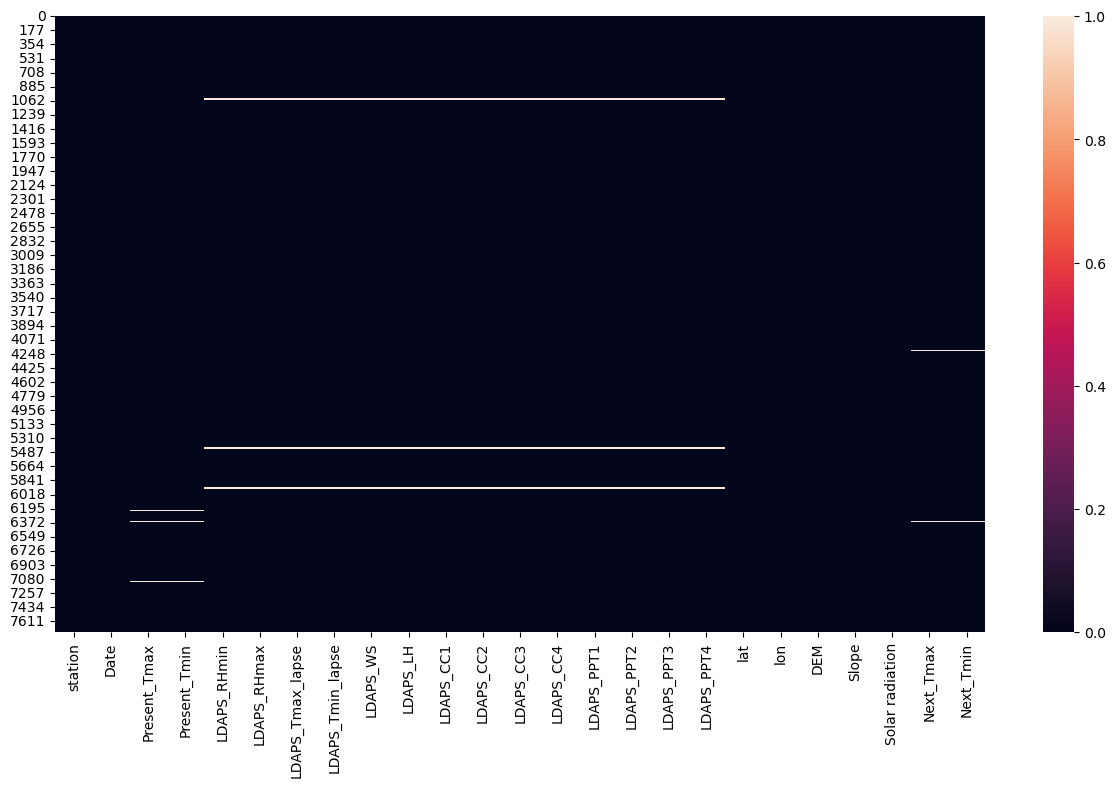

In [12]:
plt.figure(figsize= (15,8))
sns.heatmap(data.isnull())

We can see data is having missing values. Only below mentioned columns are not having any null values.   
lat                   
lon                    
DEM                     
Slope                   
Solar radiation         

In [13]:
data.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7677.000000  7677.000000  7677.000000  7677.000000  7677.000000   
mean      0.368774     0.356080     0.318404     0.299191     0.591995   
std       0.262458     0.258061     0.250362     0.254348     1.945768   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146654     0.140615     0.101388     0.081532     0.000000   
50%       0.315697     0.312421     0.262555     0.227664     0.000000   
75%       0.575489     0.558694     0.496703     0.499489     0.052525   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat          lon  \
count  7677.000000  7677.000000  7677.000000  7752.000000  7752.000000   
mean      0.485003     0.278200     0.269407    37.544722   126.991397   
std       1.762807     1.161809     1.206214     0.050352     0.079435   
min       0.000000     0.000000     0.000000    37.456200   126.826000   
25%       0.000000     0.000000     0.000000    37.510200   126.937000   
50%       0.000000     0.000000     0.000000    37.550700   126.995000   
75%       0.018364     0.007896     0.000041    37.577600   127.042000   
max      21.621661    15.841235    16.655469    37.645000   127.135000   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  
count  7752.000000  7752.000000      7752.000000  7725.000000  7725.000000  
mean     61.867972     1.257048      5341.502803    30.274887    22.932220  
std      54.279780     1.370444       429.158867     3.128010     2.487613  
min      12.370000     0.098475      4329.520508    17.400000    11.300000  
25%      28.700000     0.271300      4999.018555    28.200000    21.300000  
50%      45.716000     0.618000      5436.345215    30.500000    23.100000  
75%      59.832400     1.767800      5728.316406    32.600000    24.600000  
max     212.335000     5.178230      5992.895996    38.900000    29.800000

From above table we can see data is collected from 25 stations.  

Present_Tmax 
mean- 29.768211    
std - 2.969999  
max- 37.600000  
min- 20.000000  

Present_Tmin   
mean- 23.225059     
std - 2.413961   
max- 29.900000   
min- 11.300000   

Next_Tmax   
mean- 30.274887    
std - 3.128010   
max- 38.900000   
min- 17.400000  

Next_Tmin   
mean- 22.932220         
std - 2.487613    
max- 29.800000   
min- 11.300000   

### Treating Nan Values 

We can see Our Nan Vlaue are less than 0.01 percent, we can drop these values also,  
But here we will try to fill these values using Mean or median  
Filling Nan with median could be best stretgy here because data is ordinal type.  
lets see type of Nan values and fill them. 

In [14]:
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We are missing 2 values in station and 2 values in data.  
As we know we have 25 stations and Nan is present at 7750 and 7751 index, Here we can see data is collected in ordered way from all stations, so after 25th, count will start from 1st agin. 
so for 7750 index it will agin the 1st station for 7751 it will be the 2nd station. 

In [15]:
# Fillign Nan in station column 
data['station'].iloc[7750]=1.0 
data['station'].iloc[7751]=2.0

In [16]:
# Filling date column
data['Date'].iloc[7750]= '31-08-2017'
data['Date'].iloc[7751]= '31-08-2017'

In [17]:
# Filling rest of the values using meadian of that column
for col in data.columns:
    if col not in ['station', 'Date']:
        data[col]=data[col].replace(np.nan, data[col].median())

In [18]:
data.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Now we have filled all the Nan values with median of that column.  
Here we can see our date is object type, so we will first change it into datatime stamp for more useful information. 

In [19]:
data['Date']= pd.to_datetime(data['Date'])

### Data visualization

#### Univariate Analysis

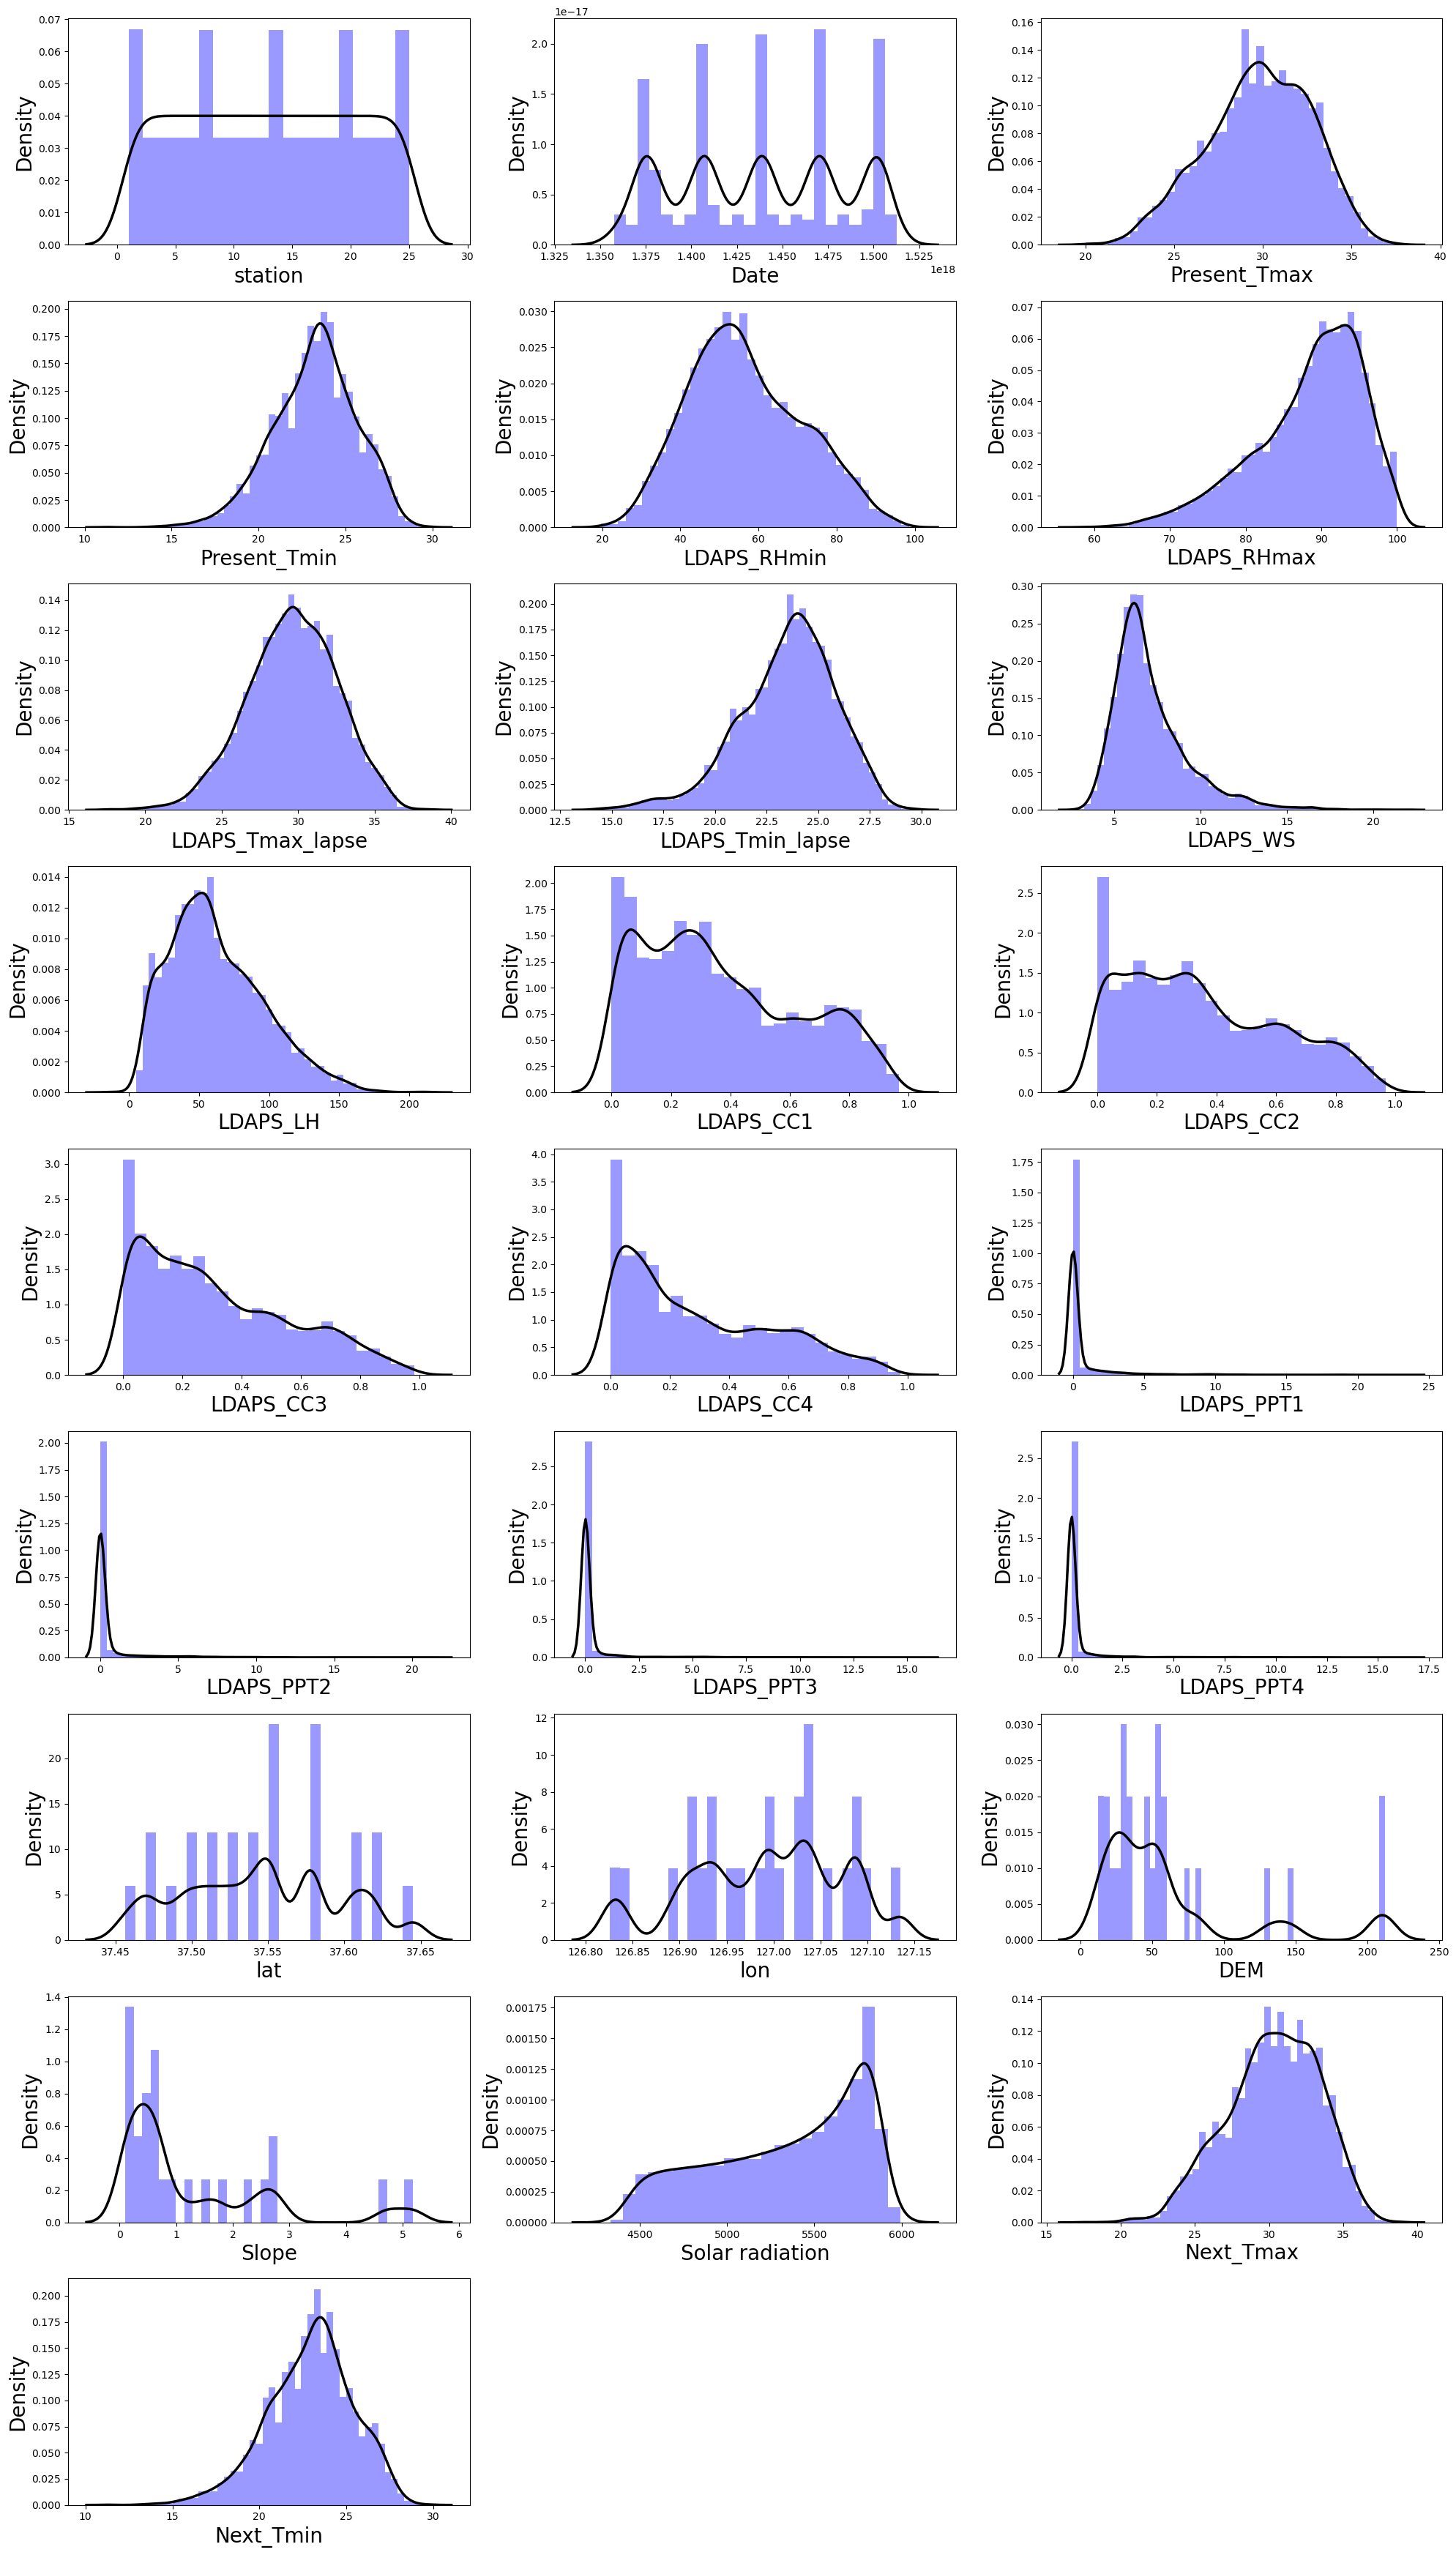

In [20]:
plt.figure(figsize=(20,35), facecolor='white')
plotnumber= 1

for column in data.columns:
    if plotnumber<=26:
        ax= plt.subplot(9,3, plotnumber)
        sns.distplot(data[column], color='blue',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
        plt.xlabel(column, fontsize= 20)
        plt.ylabel('Density', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

1. station: We have total 25 station and data is normal distributed in all 25 stations    
2. Date : We have data from 2013-06-30 to 2017-08-31    
3. Present_Tmax : Maximum air temperature between 0 and 21 h on the present day is normaly distributed.  
4. Present_Tmin : Minimum air temperature between 0 and 21 h on the present day  is normaly distributed.  
5. LDAPS_RHmin: LDAPS model forecast of next-day minimum relative humidity is normaly distributed.   
6. LDAPS_RHmax: LDAPS model forecast of next-day maximum relative humidity is having skewness and almost normaly distributed.  
7. LDAPS_Tmax_lapse: LDAPS model forecast of next-day maximum air temperature applied lapse rate is normaly distributed.   
8. LDAPS_Tmin_lapse: LDAPS model forecast of next-day minimum air temperature applied lapse rate is normaly distributed.   
9. LDAPS_WS : LDAPS model forecast of next-day average wind speed is almost normaly distributed and having skewness.   
10. LDAPS_LH: LDAPS model forecast of next-day average latent heat flux is normaly distributed.   
11. LDAPS_CC1: LDAPS model forecast of next-day 1st 6-hour split is almost normaly distribution and having positive skew  
12. LDAPS_CC2 LDAPS model forecast of next-day 2nd 6-hour split data is not normaly distributed and having negative skew  
13. LDAPS_CC3: LDAPS model forecast of next-day 3rd 6-hour split  is normaly distributed and having positive skew  
14. LDAPS_CC4: LDAPS model forecast of next-day 4th 6-hour split is almost normaly distributed and having positive skew    
15. LDAPS_PPT1,  LDAPS_PPT2,  LDAPS_PPT3,  LDAPS_PPT4  are not normaly distributed and having outliers.   
16. Solar radiation : Solar radiation is normaly distributed and having negative skewed data.  
17. Next_Tmax,  Next_Tmin The next-day maximum air temperature is normaly distributed.   


In [21]:
data['Slope'].value_counts()

2.785000    310
0.514100    310
0.271300    310
0.222300    310
0.155400    310
0.133200    310
0.572100    310
4.729600    310
1.767800    310
1.231300    310
0.697000    310
2.257900    310
0.855200    310
0.618000    310
2.686500    310
0.593100    310
0.623300    310
5.178200    310
0.412500    310
1.562900    310
0.098500    310
0.145700    310
0.505500    310
2.534800    310
0.266100    310
0.098475      1
5.178230      1
Name: Slope, dtype: int64

Text(0, 0.5, 'Counts')

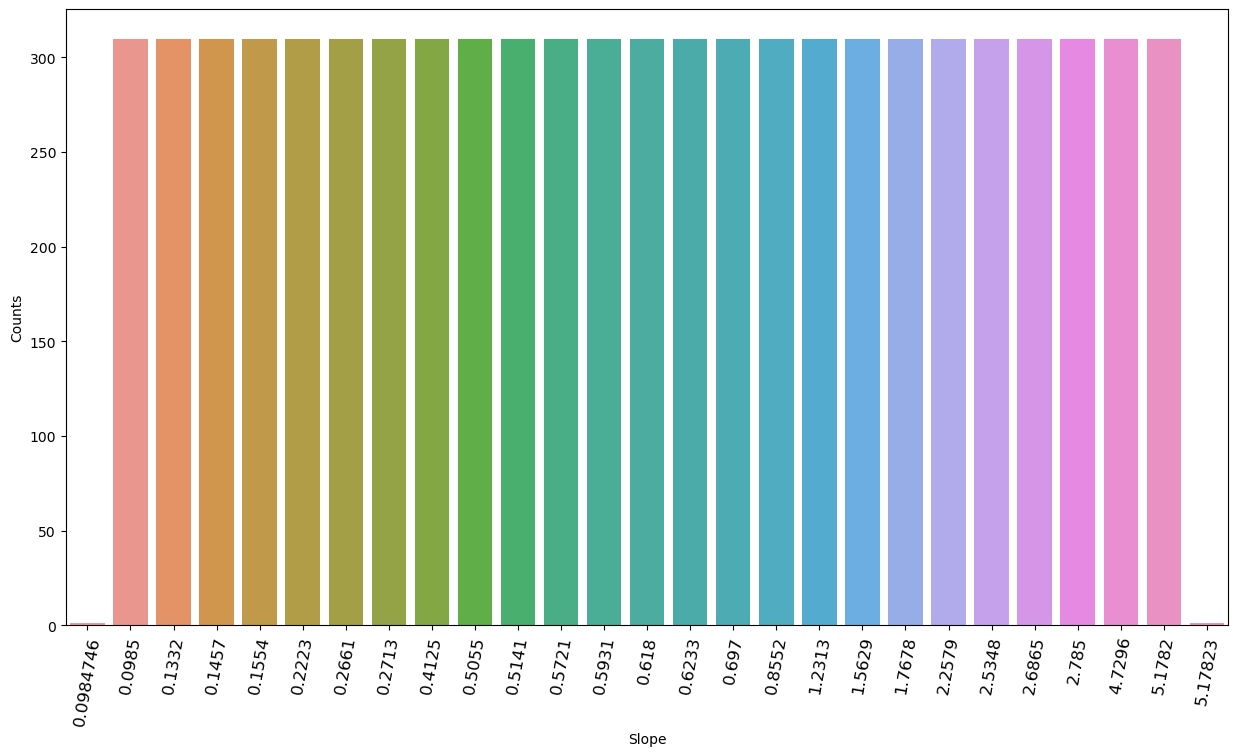

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(x='Slope',data=data)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.ylabel('Counts')

All the slope values have equal no. of counts except for 2 slopes which have only one count each.

In [23]:
data['DEM'].value_counts()

212.3350    311
12.3700     311
30.9680     310
17.2956     310
15.5876     310
21.9668     310
26.2980     310
146.5540    310
75.0924     310
56.4448     310
53.4712     310
82.2912     310
30.0464     310
59.8324     310
44.7624     310
132.1180    310
28.7000     310
208.5070    310
50.9312     310
52.5180     310
54.6384     310
35.0380     310
45.7160     310
33.3068     310
19.5844     310
Name: DEM, dtype: int64

Text(0, 0.5, 'Counts')

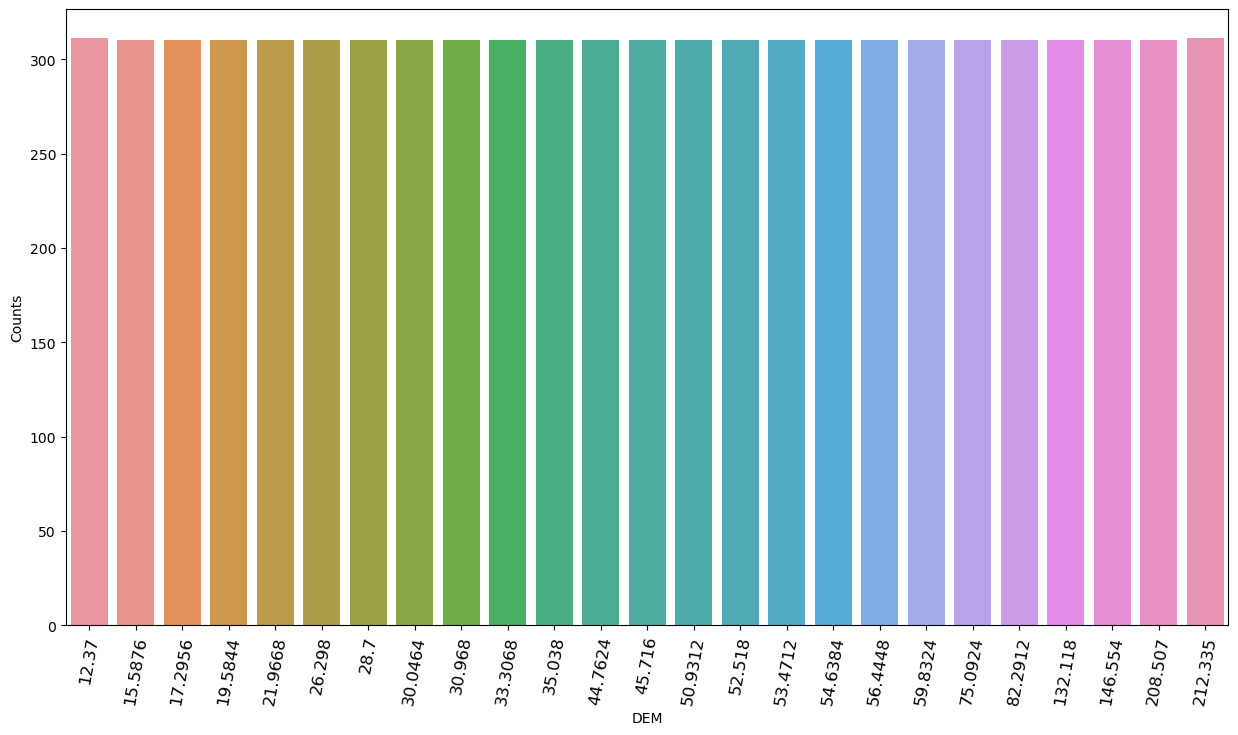

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(x='DEM',data=data)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.ylabel('Counts')

All the elevations have same count equal to 310 except two who have 311 counts each

## Bivariate Analysis

Here we will analyse our data against our target column. 

Lets analyse the graphs between date and in our target columns. 
we will use line plot for numerical to numerical data visualization. 

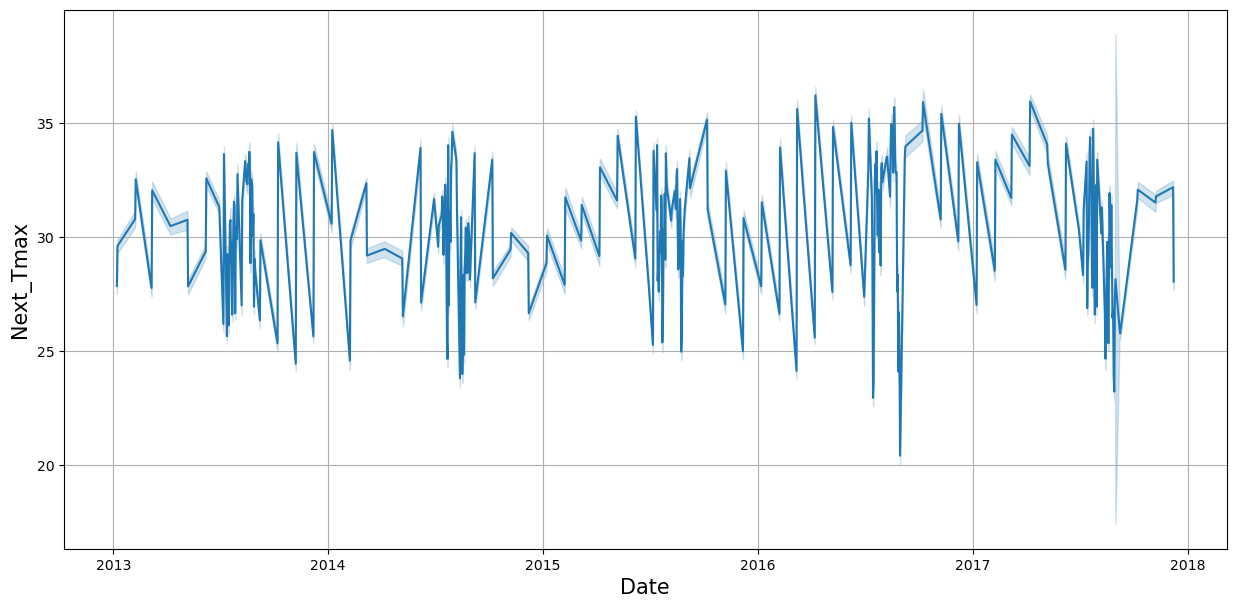

In [25]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Date', y='Next_Tmax', data= data )
plt.xlabel('Date', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

From the Graphs we can see the Next_Tmax is maximum  between te 2017 to 2018 and it is min between 2016 to 2017. 

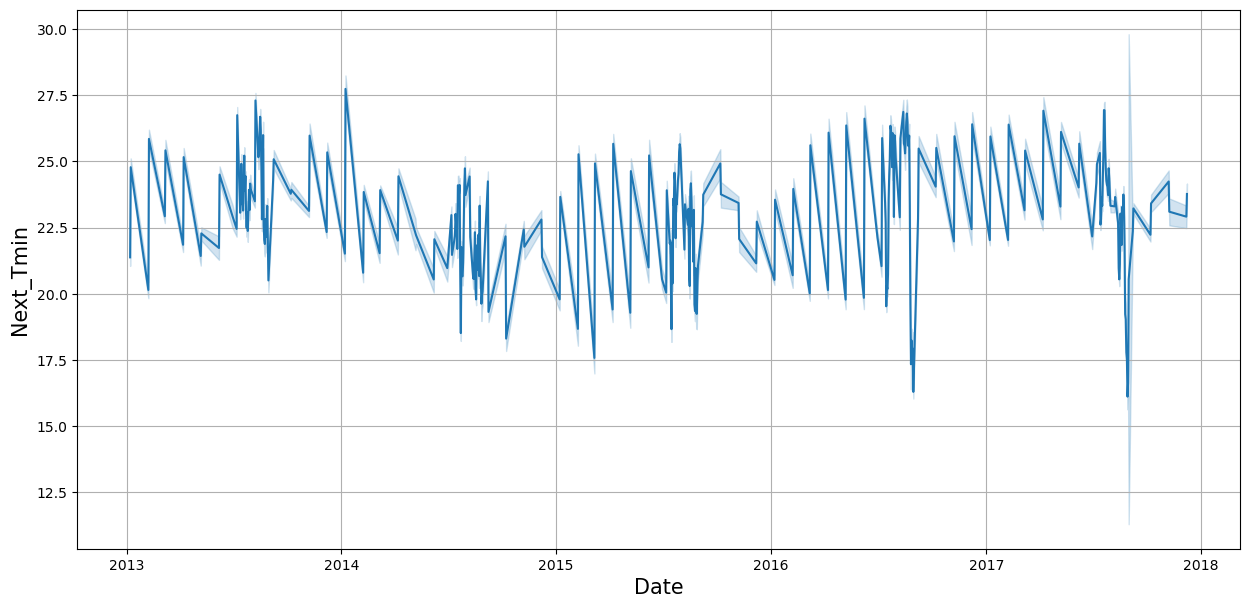

In [26]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Date', y='Next_Tmin', data= data )
plt.xlabel('Date', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

From the Graphs we can see the Next_Tmin is maximum is in the starting of 2014 and it is minimum between 2017 to 2018. 

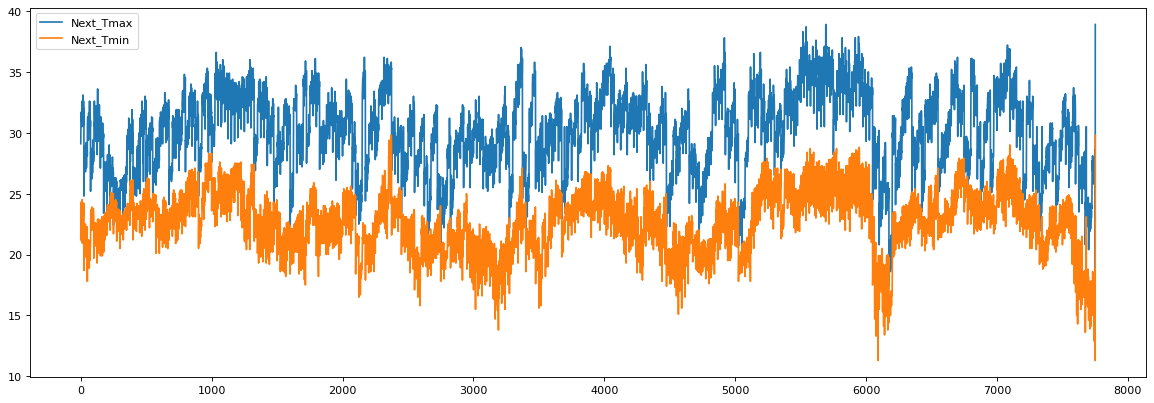

In [27]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(data["Next_Tmax"],label="Next_Tmax")
plt.plot(data["Next_Tmin"],label="Next_Tmin")
plt.legend()
plt.show()

Here we can see Next_tmin and Next_tmax both showing almost equal kind of pattern. where there is growth in the Tmax, same kind of growth we can see in Tmin. 

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

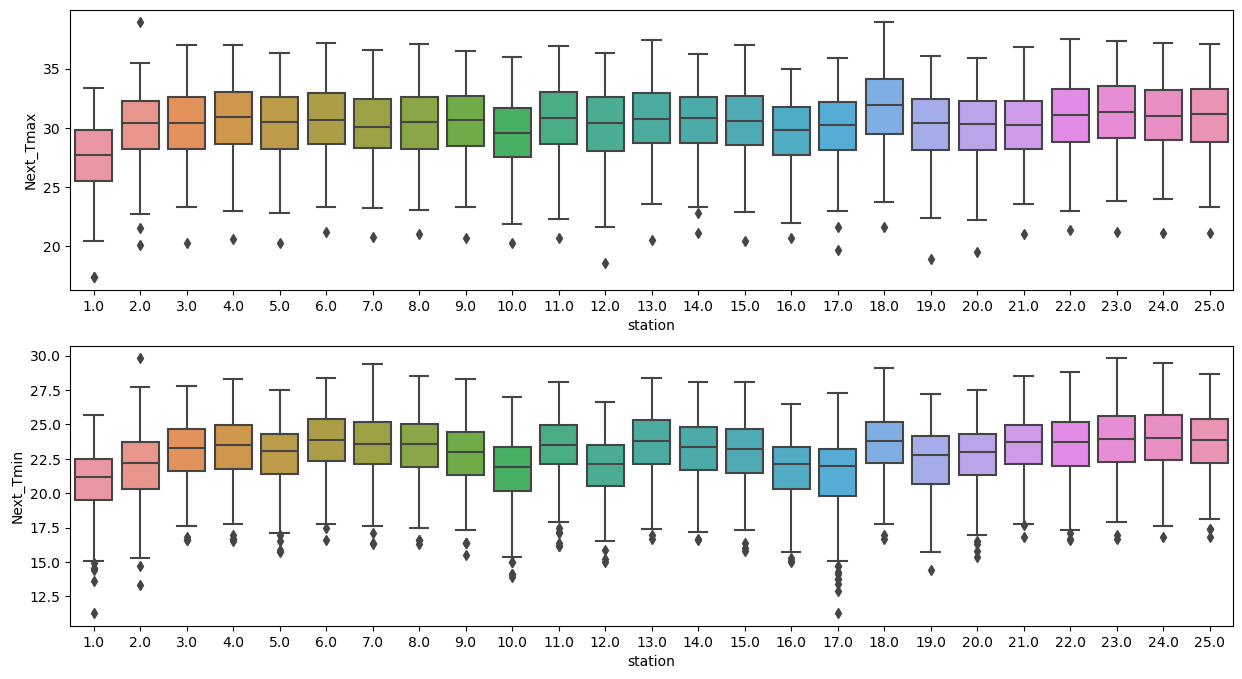

In [28]:
#Ploting wrt to station
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data=data)

plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin',data=data)

Graph showing the temprature at every 25 stations. we can clearly see Tmax and Tmin is maximum at station 18 and it is minimun at station 1 

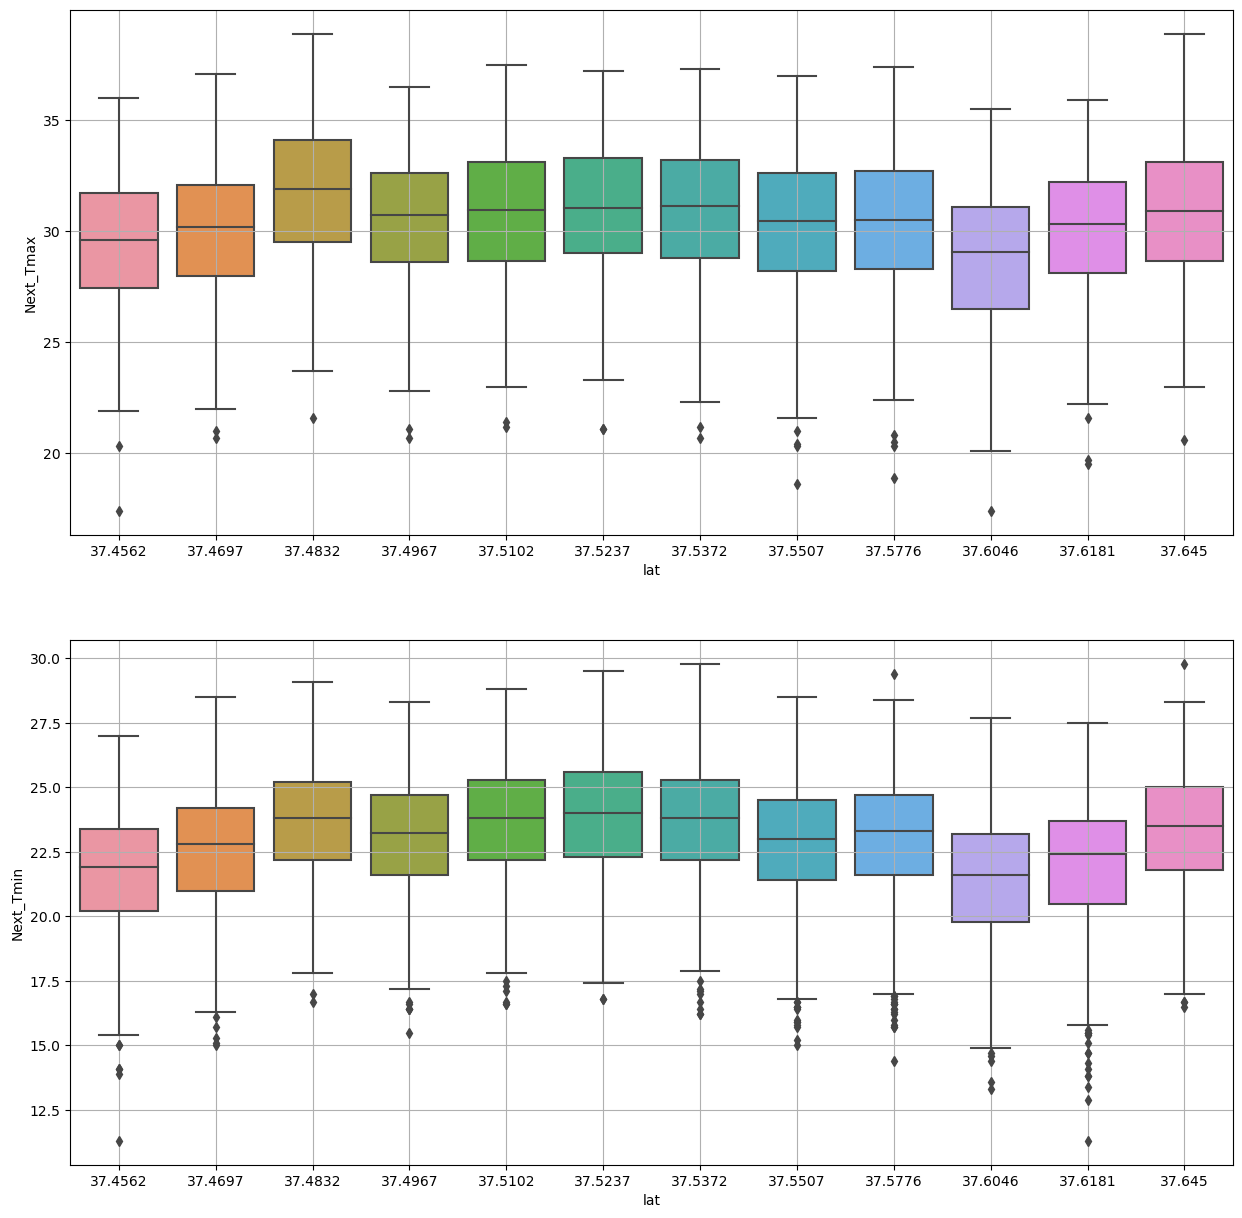

In [29]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.boxplot(x='lat',y='Next_Tmax',data=data)
plt.grid(True)
plt.subplot(2,1,2)
sns.boxplot(x='lat',y='Next_Tmin',data=data)
plt.grid(True)


Here we can see the relationship between latitude and Next temprature.  
we can see Next_Tmax increases with increase in the latitude while this is not the True for Next_Tmin 

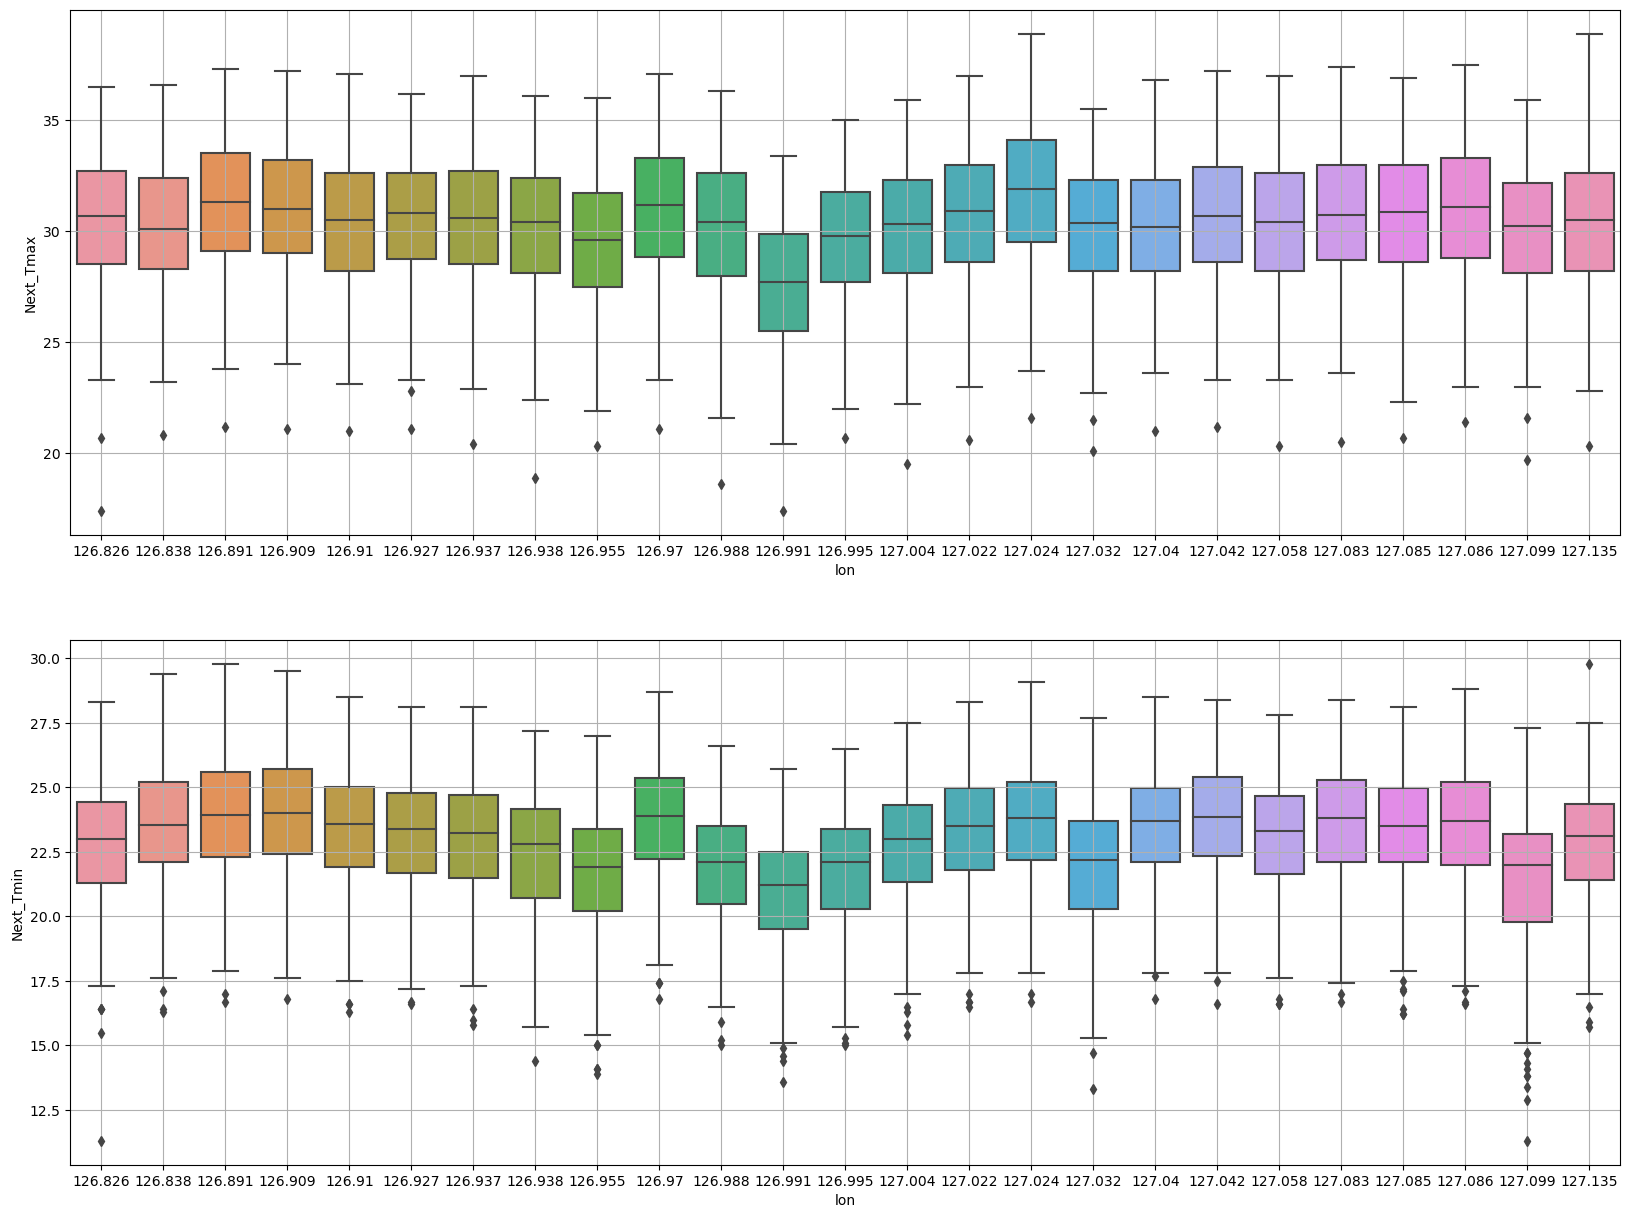

In [30]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.boxplot(x='lon',y='Next_Tmax',data=data)
plt.grid(True)
plt.subplot(2,1,2)
sns.boxplot(x='lon',y='Next_Tmin',data=data)
plt.grid(True)

Here we can see there is not direct relationship between the temprature and Longitude. 

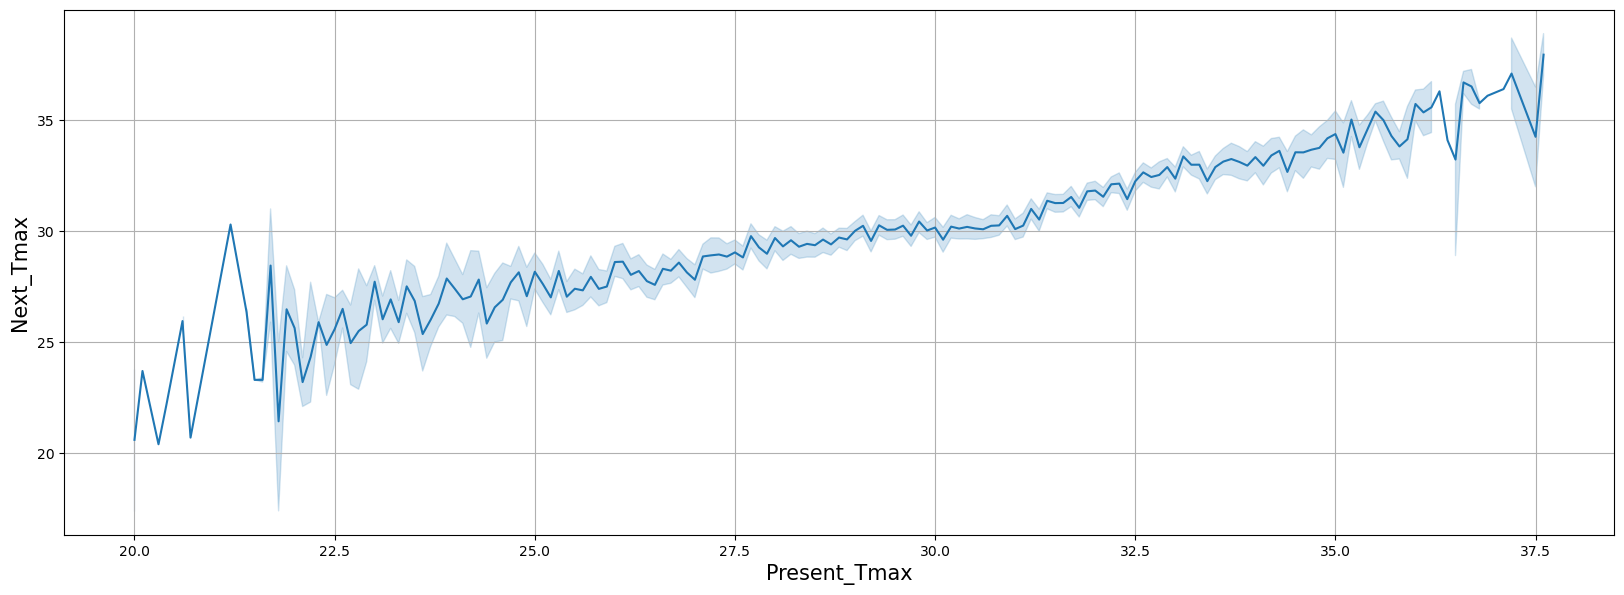

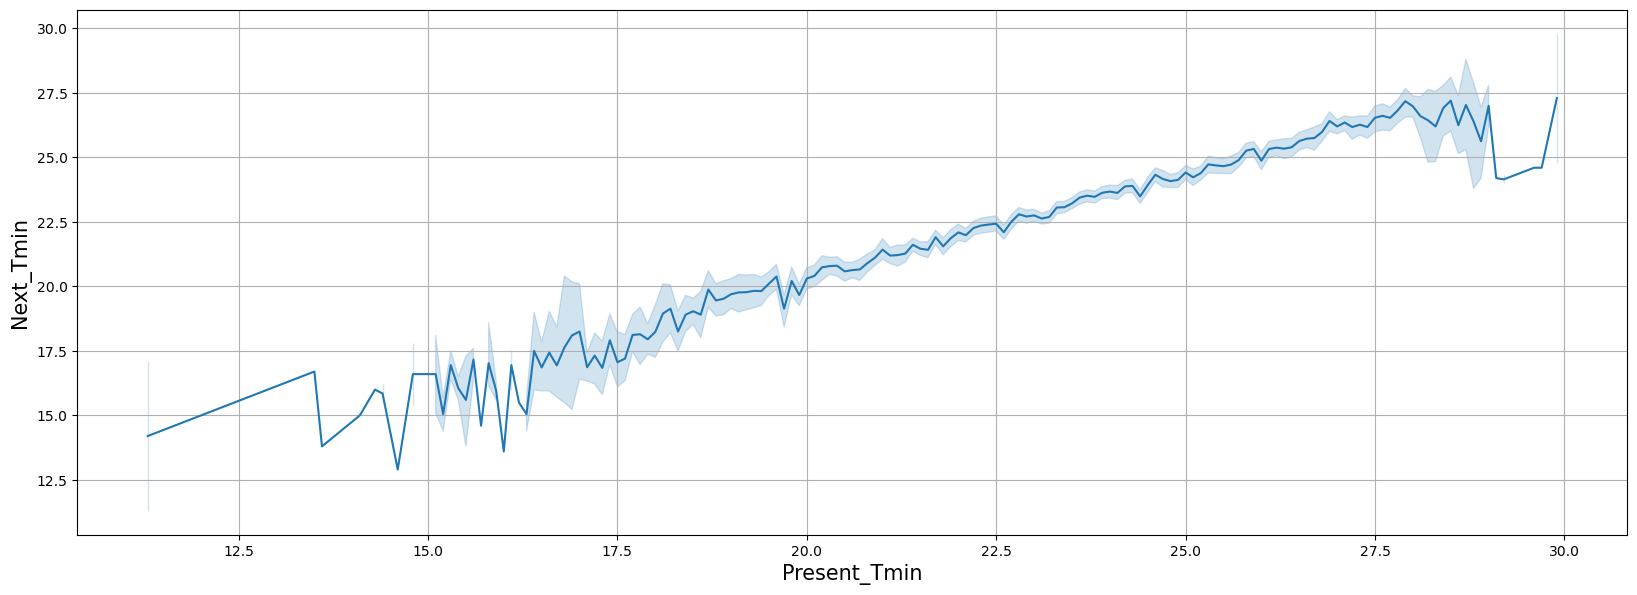

In [31]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.lineplot(x='Present_Tmax', y='Next_Tmax', data= data )
plt.xlabel('Present_Tmax', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.lineplot(x='Present_Tmin', y='Next_Tmin', data= data )
plt.xlabel('Present_Tmin', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

The Graph showing relationship between Present and Next Tmin and Tmax , we can see a linear relationship between bith the temparture, and it is ture also. 
The cahnge in the temprature cannot be drastic, it can be can be positve or negative by few points only. 

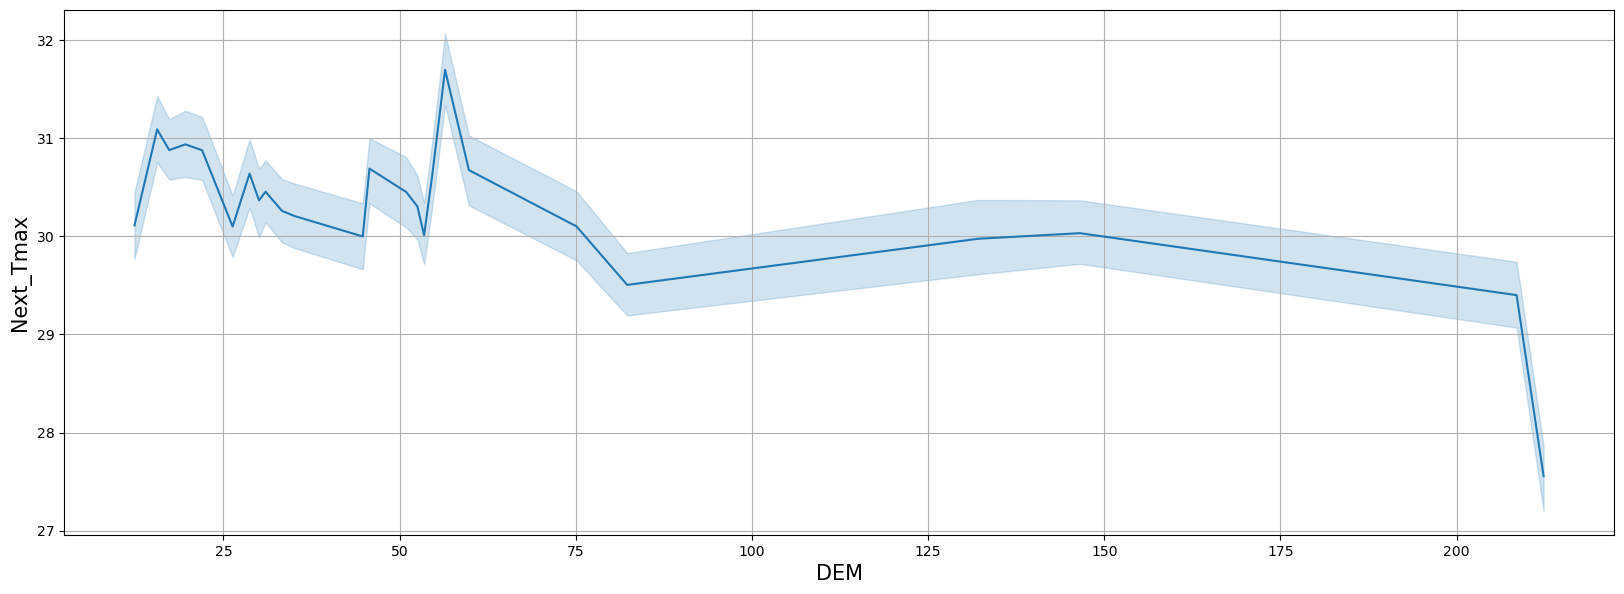

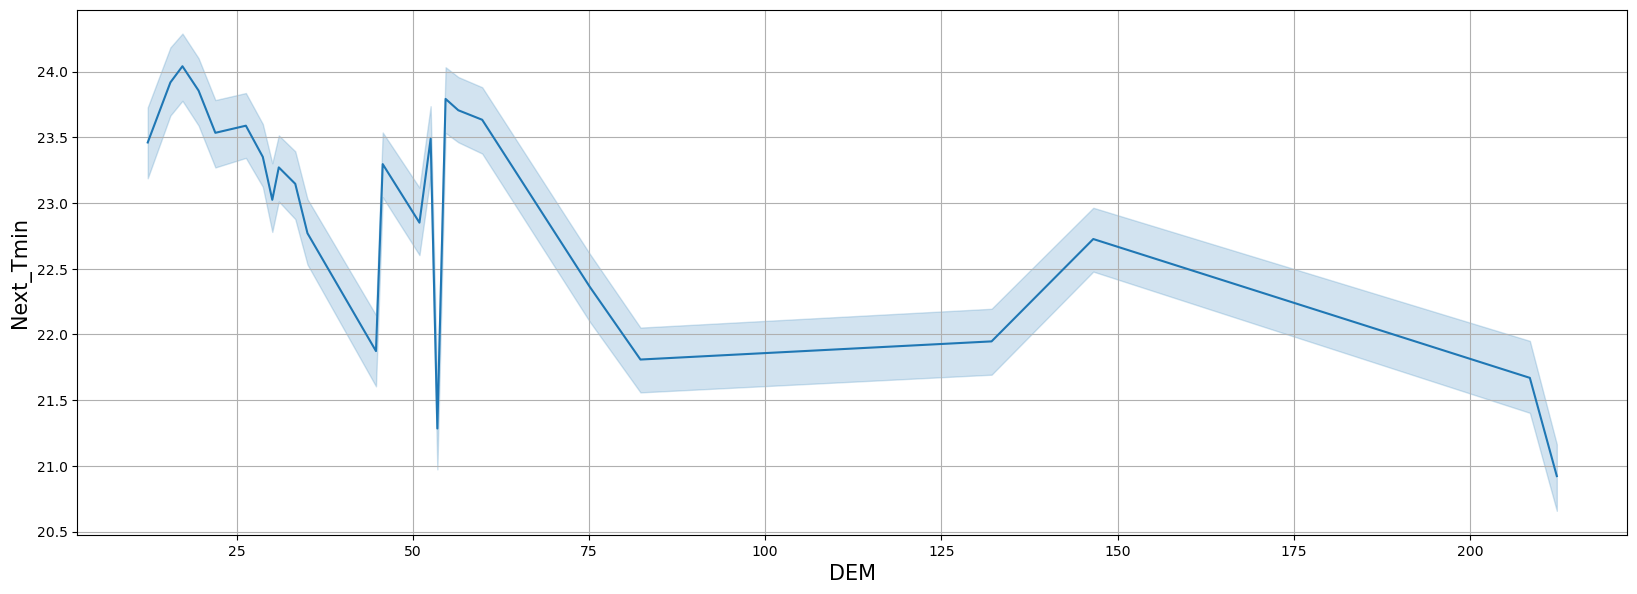

In [32]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.lineplot(x='DEM', y='Next_Tmax', data= data )
plt.xlabel('DEM', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.lineplot(x='DEM', y='Next_Tmin', data= data )
plt.xlabel('DEM', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

The graph showing the relationship between the Temprature and elevation.  
As we can see with increase in the elevation there is decrease in the Next_Tmin and Next_Tmax. 

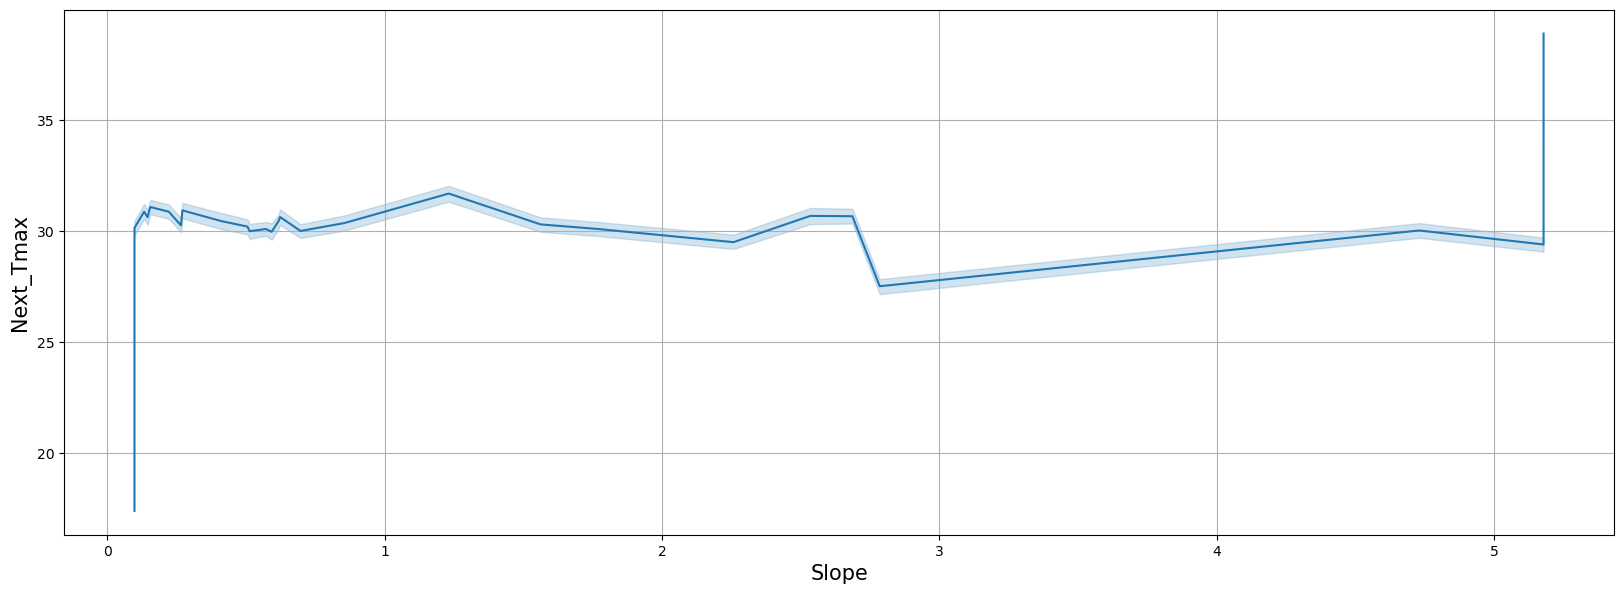

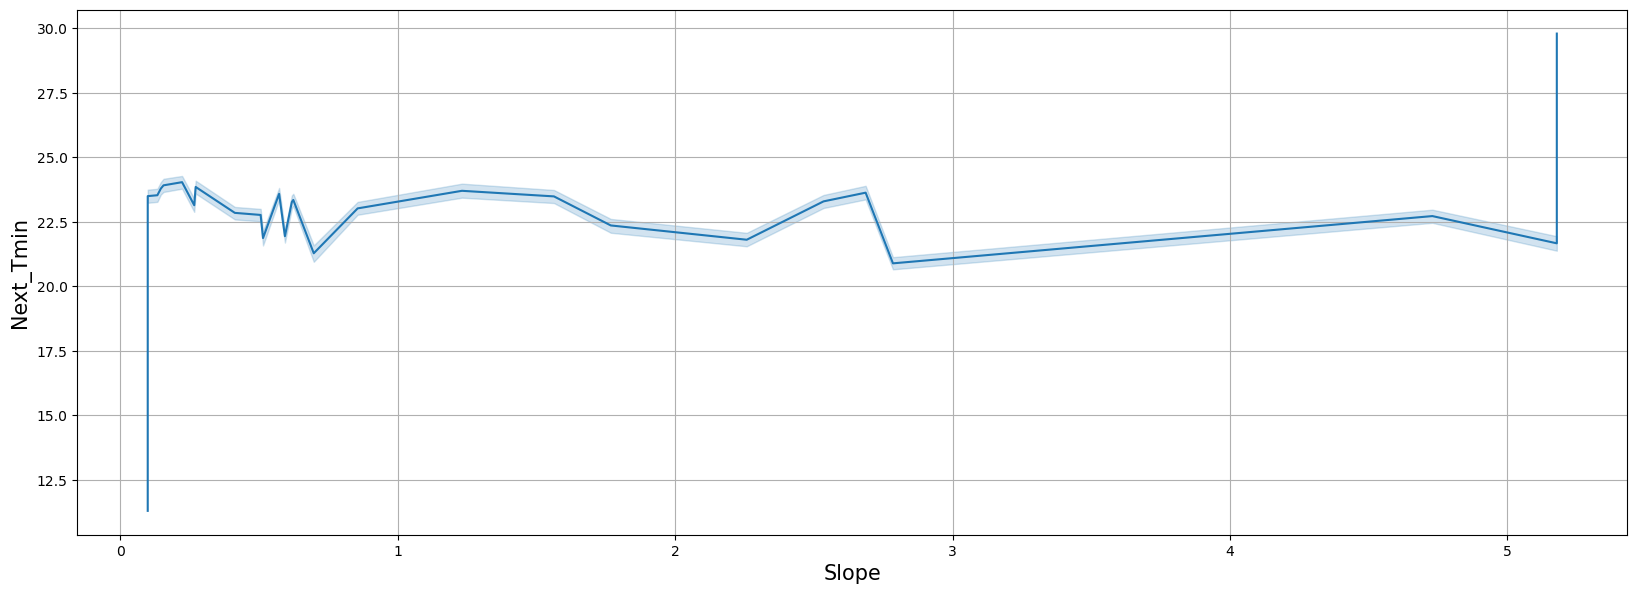

In [33]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.lineplot(x='Slope', y='Next_Tmax', data= data )
plt.xlabel('Slope', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.lineplot(x='Slope', y='Next_Tmin', data= data )
plt.xlabel('Slope', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

Here we can see with increase initially the temprature increases but it is almost constant but after 5 it is increases.  
Both the Tempratures showing same relation.

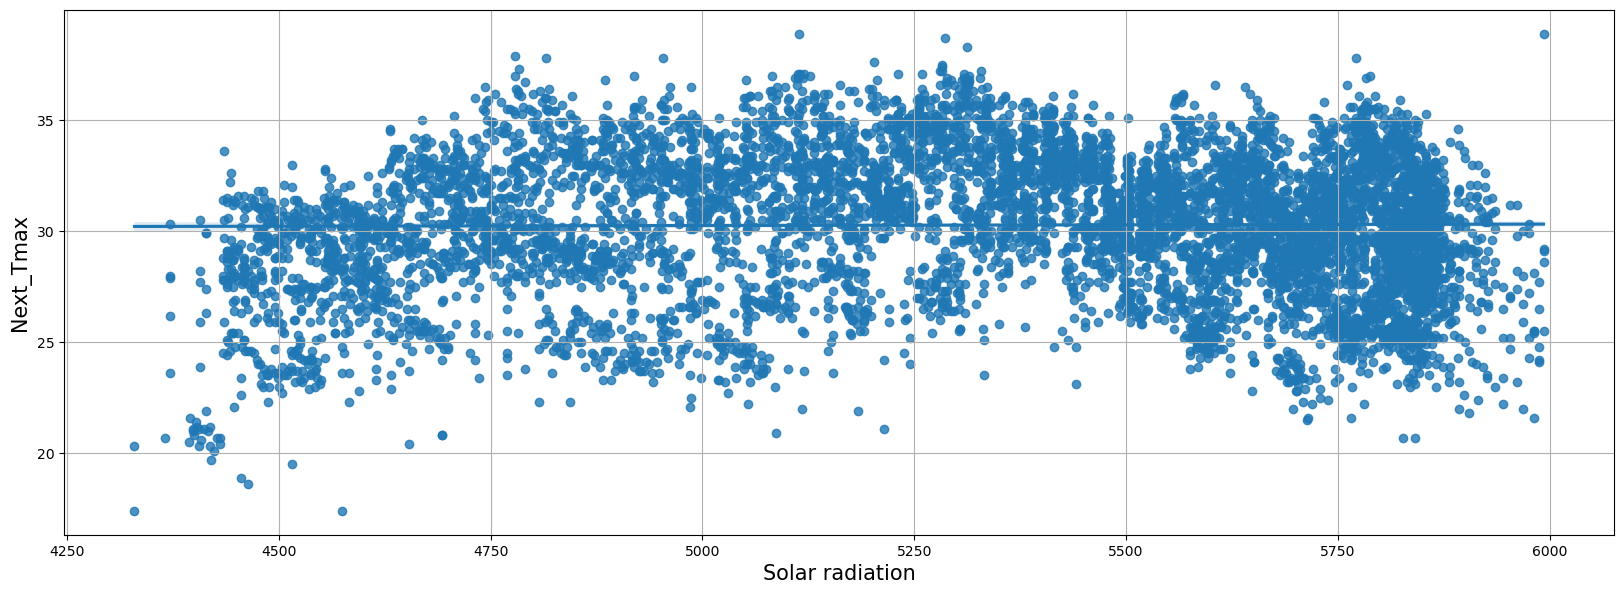

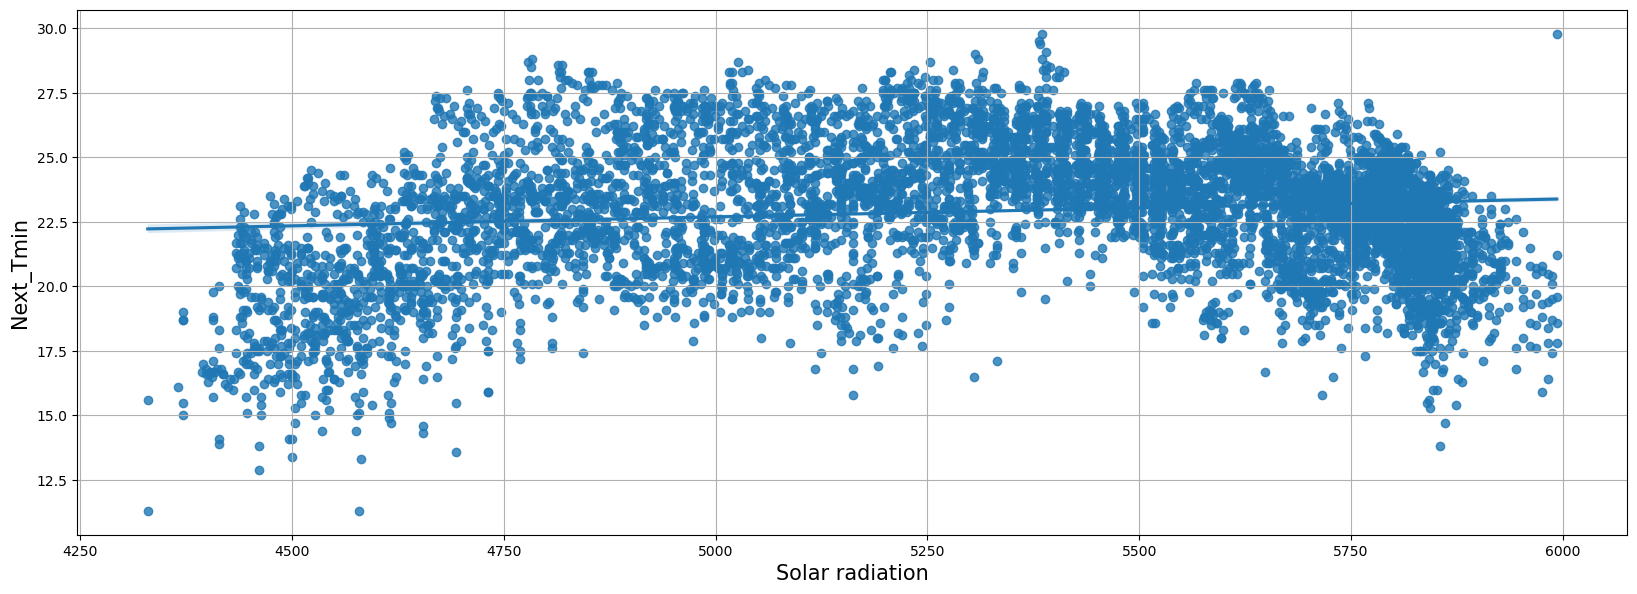

In [34]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.regplot(x='Solar radiation', y='Next_Tmax', data= data )
plt.xlabel('Solar radiation', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.regplot(x='Solar radiation', y='Next_Tmin', data= data )
plt.xlabel('Solar radiation', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

Here we can see relationship between solar radiation and temprature.  we can see strong but non linear relation between both the quantity.  


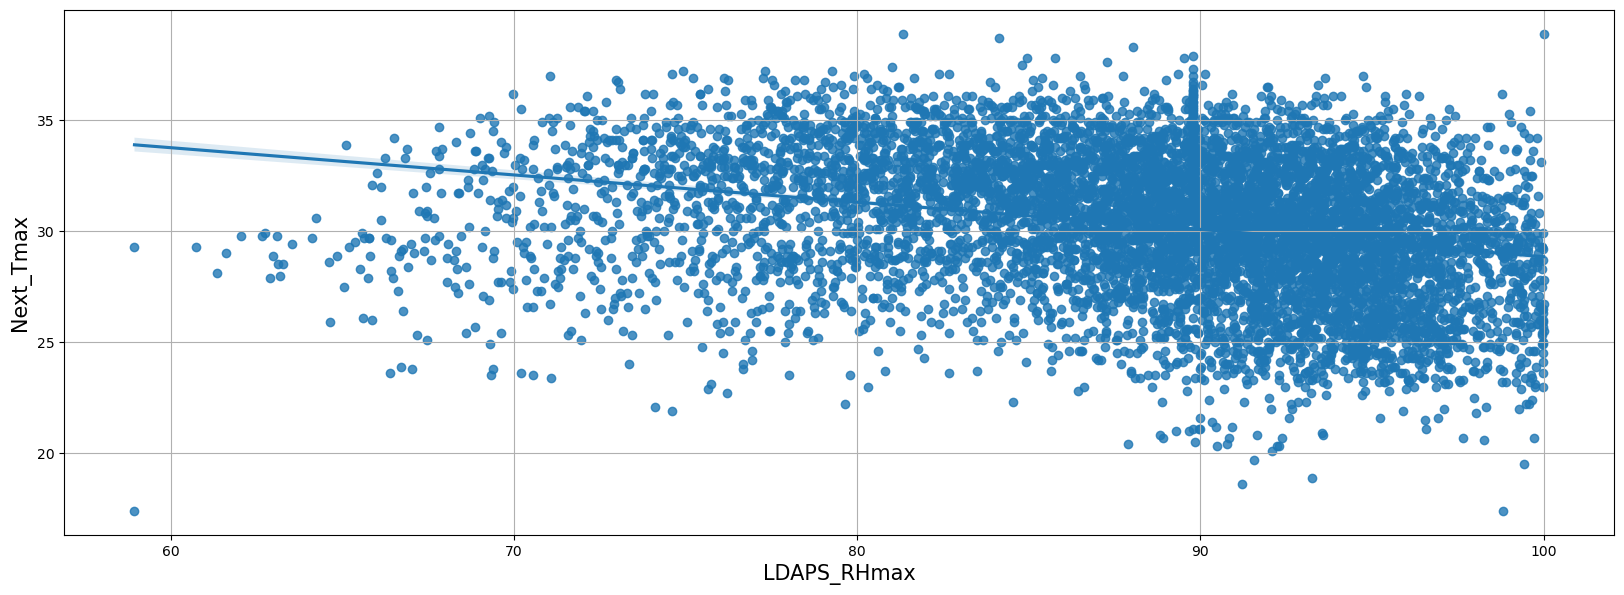

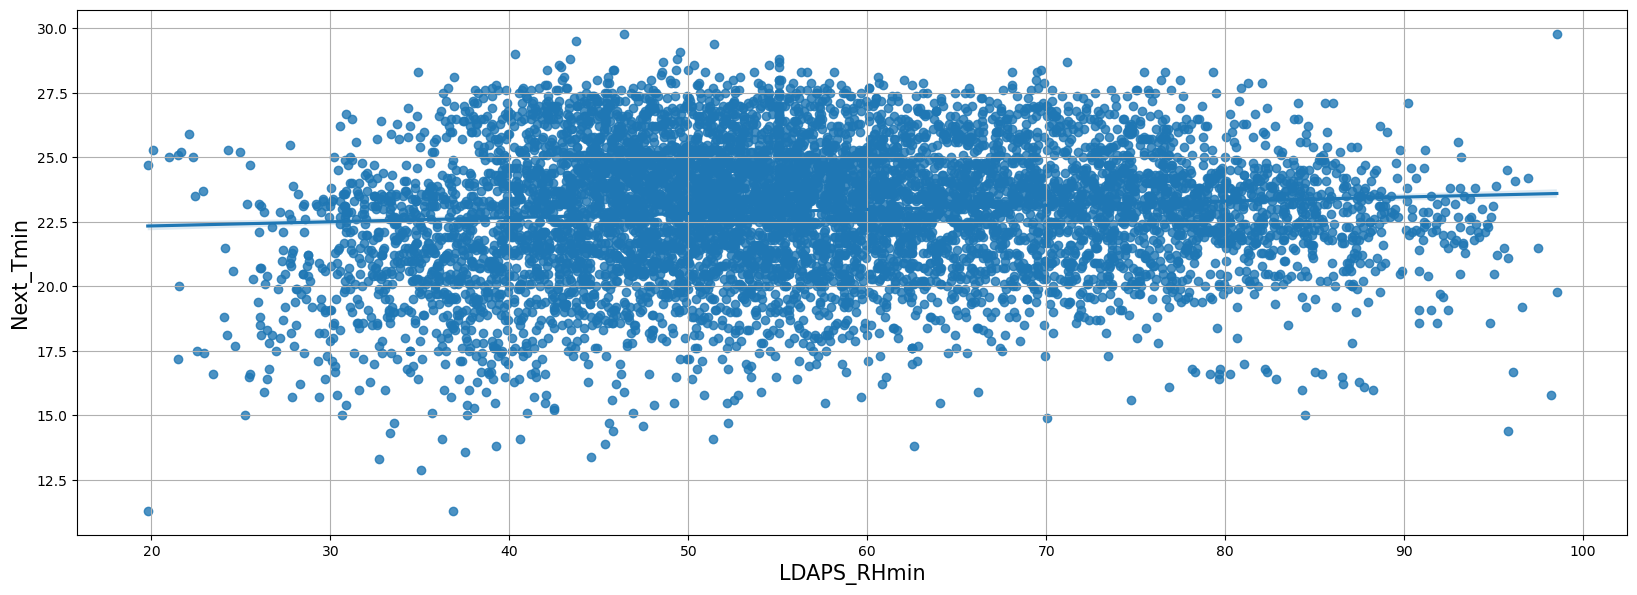

In [35]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.regplot(x='LDAPS_RHmax', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_RHmax', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.regplot(x='LDAPS_RHmin', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_RHmin', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

Here we can see Moderate negative relationship

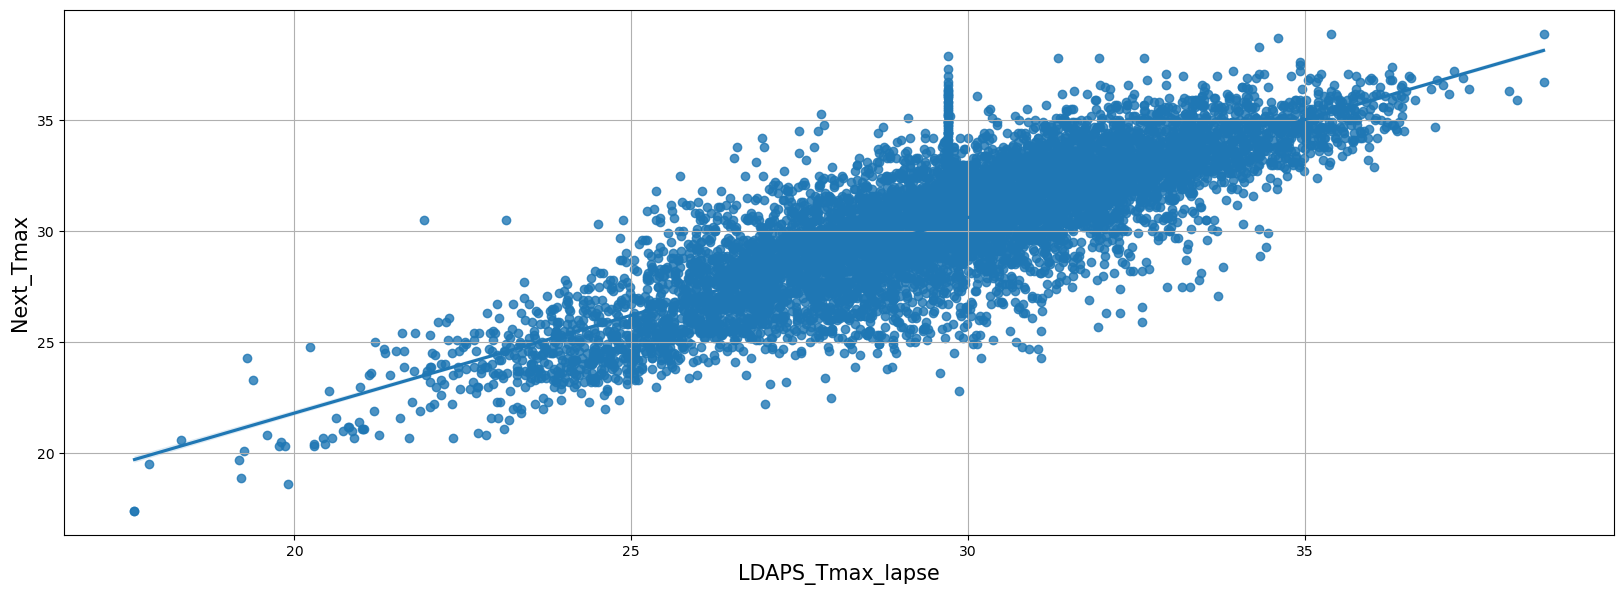

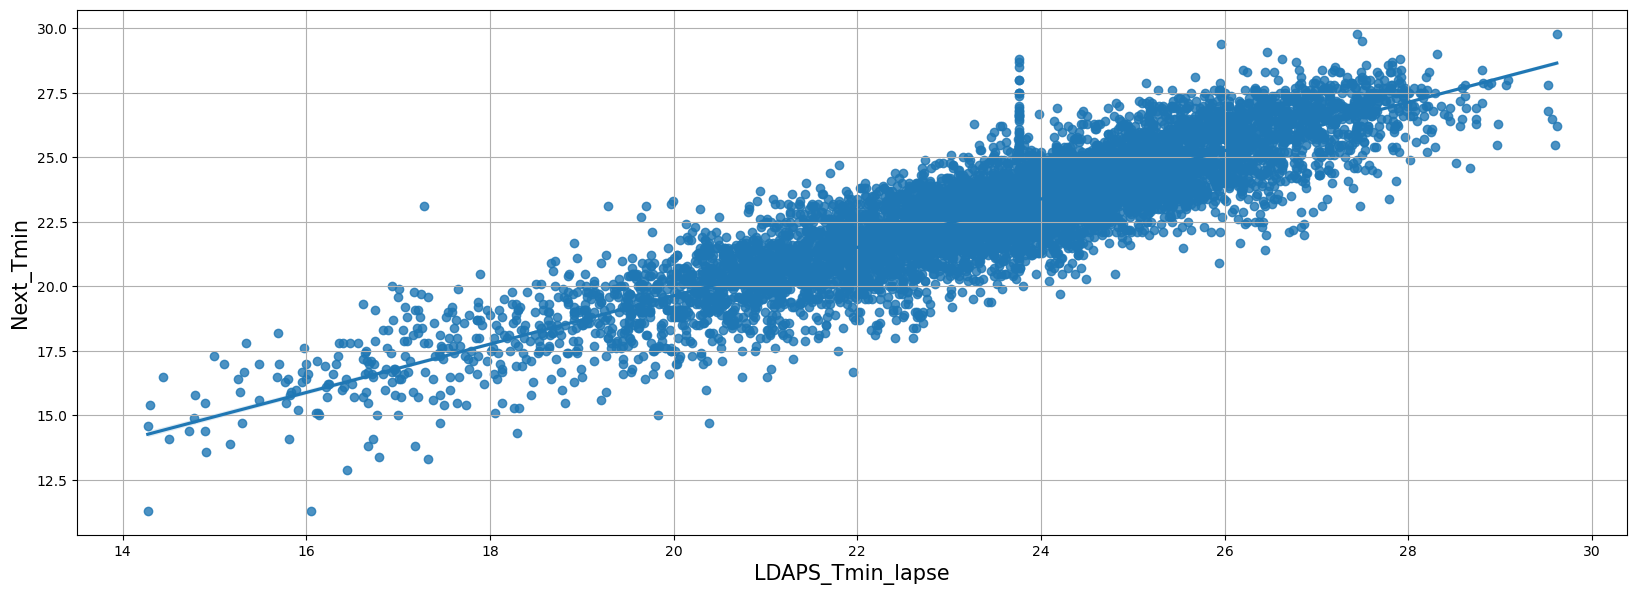

In [36]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.regplot(x='LDAPS_Tmax_lapse', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_Tmax_lapse', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.regplot(x='LDAPS_Tmin_lapse', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_Tmin_lapse', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

The Graph shows relationship betweem Air_temprature and Next day temprature. We can observe a clearly as strong positive relatoionship.  

Text(0, 0.5, 'Next_Tmin')

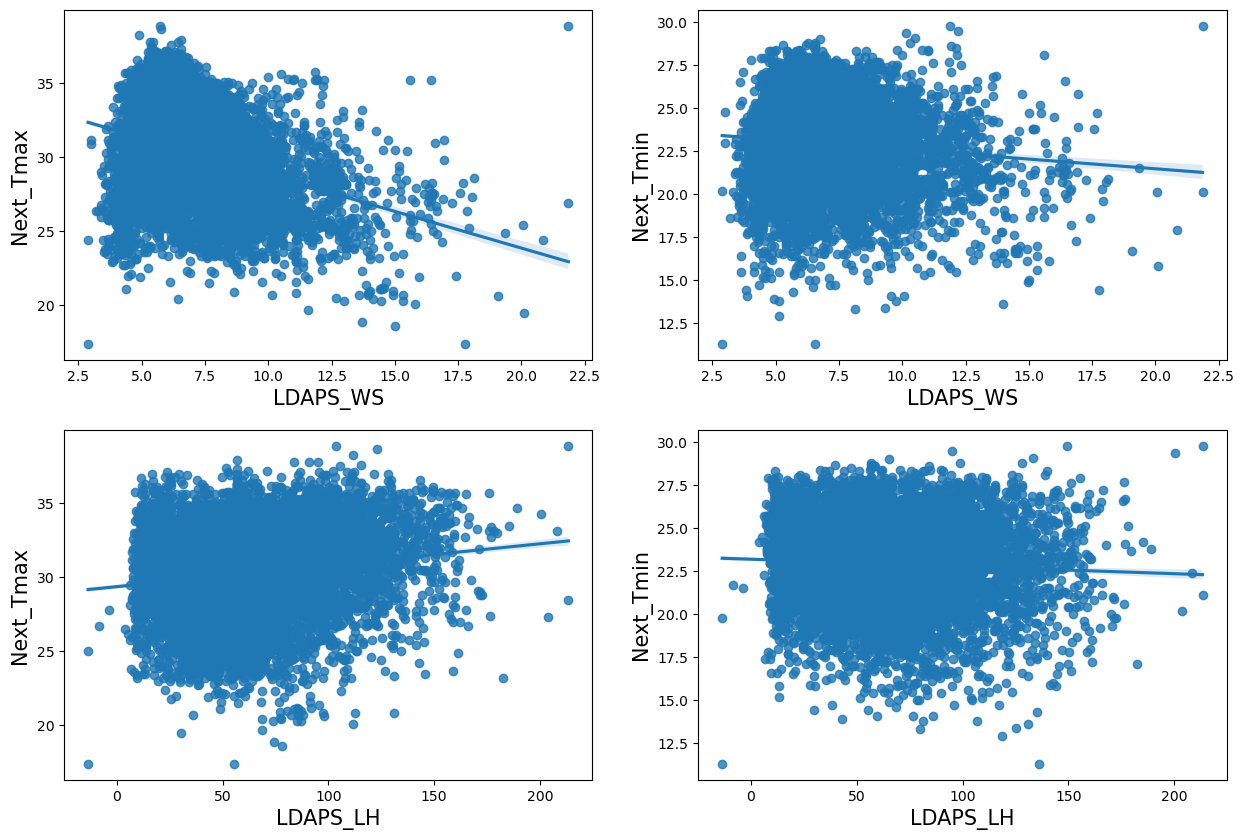

In [37]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_WS', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_WS', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)


plt.subplot(2,2,2)
sns.regplot(x='LDAPS_WS', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_WS', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)



plt.subplot(2,2,3)
sns.regplot(x='LDAPS_LH', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_LH', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)



plt.subplot(2,2,4)
sns.regplot(x='LDAPS_LH', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_LH', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)


Here Graph shows the relationship between the latent heat and Next Day temprature.  
We can see decrease in the temprature with increase of latent heat , in the forth graph we can see no relation with Latent heat and temprature. 

Text(0, 0.5, 'Next_Tmin')

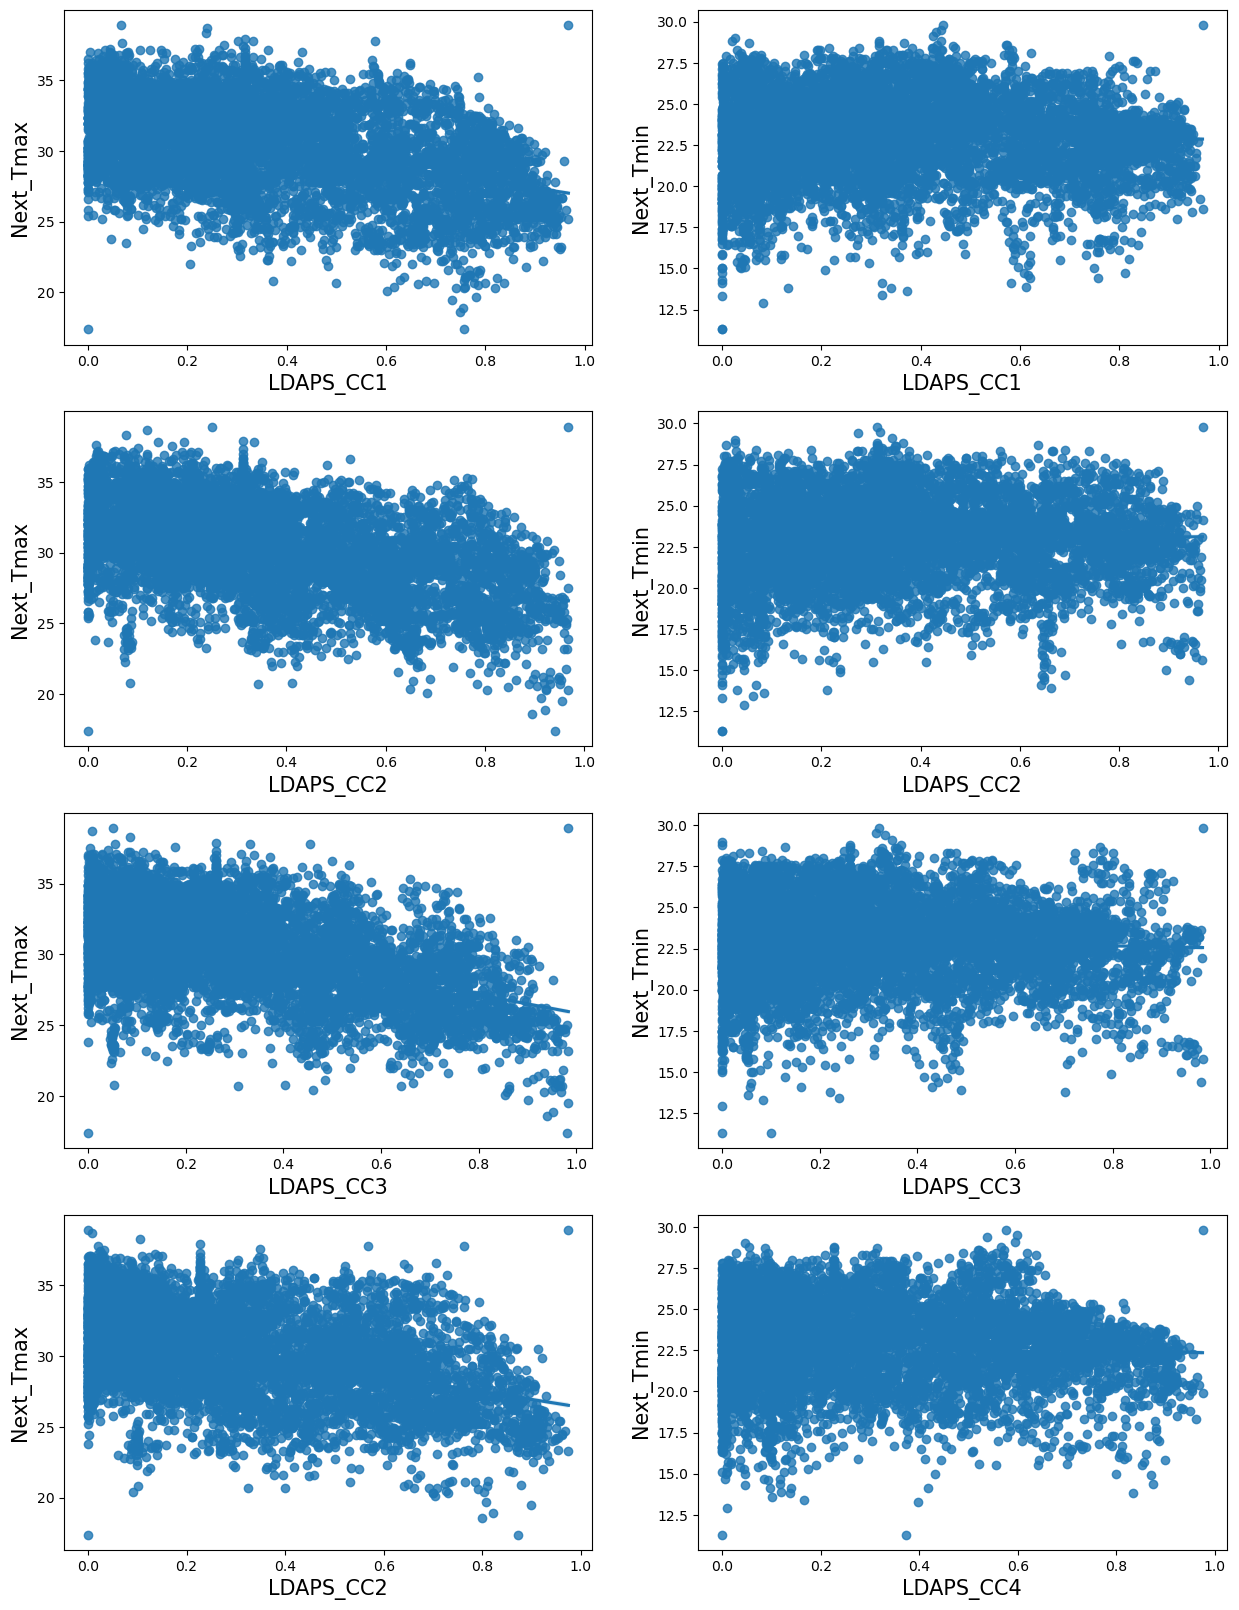

In [38]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.regplot(x='LDAPS_CC1', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_CC1', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)


plt.subplot(4,2,2)
sns.regplot(x='LDAPS_CC1', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_CC1', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)



plt.subplot(4,2,3)
sns.regplot(x='LDAPS_CC2', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_CC2', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)



plt.subplot(4,2,4)
sns.regplot(x='LDAPS_CC2', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_CC2', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)


plt.subplot(4,2,5)
sns.regplot(x='LDAPS_CC3', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_CC3', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)


plt.subplot(4,2,6)
sns.regplot(x='LDAPS_CC3', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_CC3', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)



plt.subplot(4,2,7)
sns.regplot(x='LDAPS_CC4', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_CC2', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)



plt.subplot(4,2,8)
sns.regplot(x='LDAPS_CC4', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_CC4', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)

Here we can see the graphs between split average cloud cover and Next day temprature.  
Graphs Showing is not showing very good relationship.   
In most of the graphs we can see slightly negative relation.   

Text(0, 0.5, 'Next_Tmin')

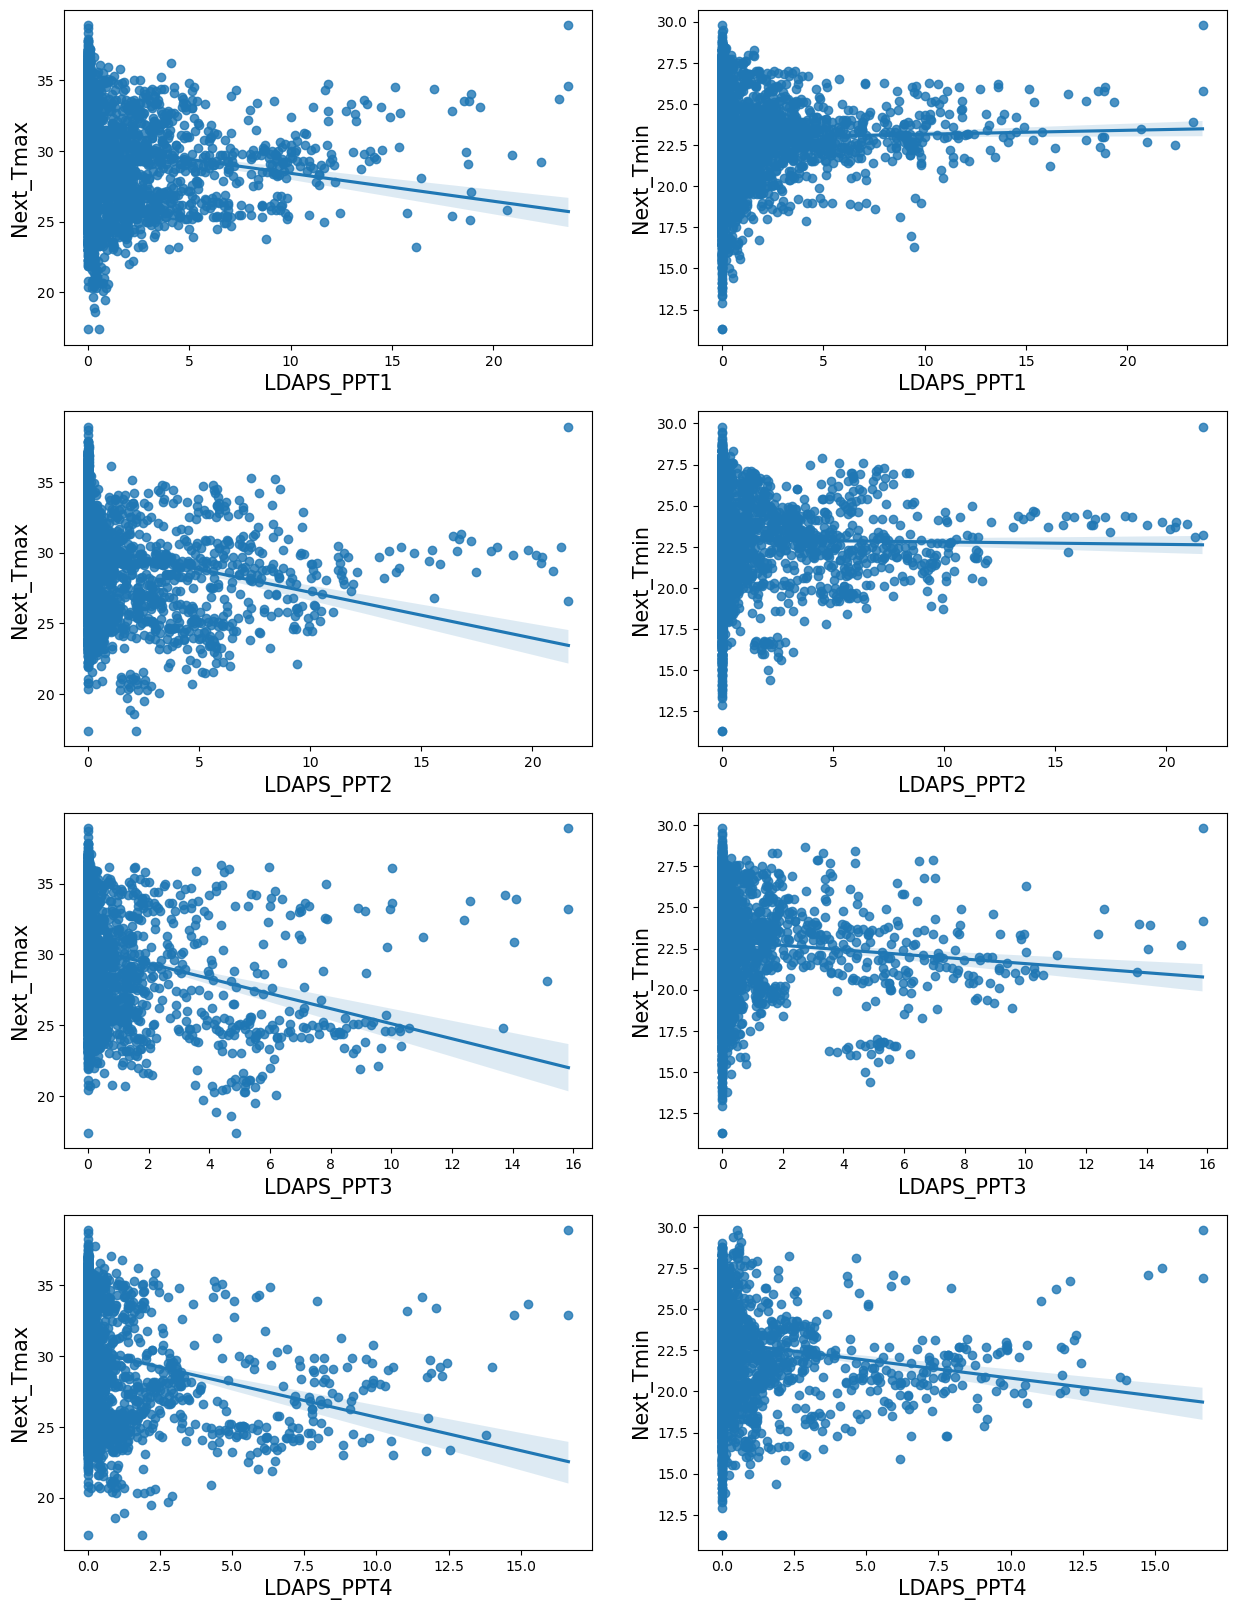

In [39]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.regplot(x='LDAPS_PPT1', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_PPT1', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)


plt.subplot(4,2,2)
sns.regplot(x='LDAPS_PPT1', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_PPT1', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)



plt.subplot(4,2,3)
sns.regplot(x='LDAPS_PPT2', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_PPT2', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)



plt.subplot(4,2,4)
sns.regplot(x='LDAPS_PPT2', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_PPT2', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)


plt.subplot(4,2,5)
sns.regplot(x='LDAPS_PPT3', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_PPT3', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)


plt.subplot(4,2,6)
sns.regplot(x='LDAPS_PPT3', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_PPT3', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)



plt.subplot(4,2,7)
sns.regplot(x='LDAPS_PPT4', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_PPT4', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)



plt.subplot(4,2,8)
sns.regplot(x='LDAPS_PPT4', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_PPT4', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)

Here we can see realtioship between split average precipitation and Temprature , we can clearly see a negative realtionship between both the quantities. 

### Data Preprocessing 

In this Step we will perform all the preprocessing steps before model buiding like we will drop the irrelivent columns, we scale the data and remove the skewness and ouliers. 

Lets Firts drop the irrilevent columns. 

From Data analysis step we can see date, lat and lon are having less or clearly no  effect on tagate. 
Station is numerical counting also not having any effect on temprature, lets drop all the columsn mentioned here. 

In [40]:
data.drop(['station', 'Date', 'lat', 'lon'], axis= 1, inplace= True)

In [41]:
data.shape

(7752, 21)

Here we can see we left with only 21 columns, lets Check Correlation 

### Checkign Correlation

In [42]:
data.corr()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Present_Tmax          1.000000      0.618769    -0.205341    -0.300261   
Present_Tmin          0.618769      1.000000     0.121800    -0.012659   
LDAPS_RHmin          -0.205341      0.121800     1.000000     0.578770   
LDAPS_RHmax          -0.300261     -0.012659     0.578770     1.000000   
LDAPS_Tmax_lapse      0.570287      0.464420    -0.564575    -0.373274   
LDAPS_Tmin_lapse      0.624229      0.764239     0.089346    -0.113914   
LDAPS_WS             -0.123565     -0.037682     0.294537     0.134786   
LDAPS_LH              0.134216     -0.011331    -0.070654     0.238183   
LDAPS_CC1            -0.313176      0.082000     0.613885     0.436097   
LDAPS_CC2            -0.214904      0.088309     0.745482     0.390879   
LDAPS_CC3            -0.145477     -0.005304     0.689720     0.226434   
LDAPS_CC4            -0.142549     -0.047496     0.514163     0.130008   
LDAPS_PPT1           -0.111148      0.109085     0.262875     0.267698   
LDAPS_PPT2           -0.101362      0.064851     0.391110     0.228398   
LDAPS_PPT3           -0.122051     -0.049017     0.240831     0.134087   
LDAPS_PPT4           -0.101118     -0.065550     0.168797     0.117376   
DEM                  -0.187138     -0.250299     0.102108     0.177134   
Slope                -0.105884     -0.146460     0.123736     0.219557   
Solar radiation      -0.025401      0.053638     0.244643     0.148259   
Next_Tmax             0.610256      0.471723    -0.439171    -0.281282   
Next_Tmin             0.622700      0.796657     0.094061    -0.070193   

                  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
Present_Tmax              0.570287          0.624229 -0.123565  0.134216   
Present_Tmin              0.464420          0.764239 -0.037682 -0.011331   
LDAPS_RHmin              -0.564575          0.089346  0.294537 -0.070654   
LDAPS_RHmax              -0.373274         -0.113914  0.134786  0.238183   
LDAPS_Tmax_lapse          1.000000          0.654013 -0.311973  0.047954   
LDAPS_Tmin_lapse          0.654013          1.000000 -0.130245 -0.134906   
LDAPS_WS                 -0.311973         -0.130245  1.000000  0.007115   
LDAPS_LH                  0.047954         -0.134906  0.007115  1.000000   
LDAPS_CC1                -0.438410          0.010691  0.289792 -0.146920   
LDAPS_CC2                -0.523594          0.047545  0.261386 -0.263934   
LDAPS_CC3                -0.541260         -0.044233  0.243402 -0.245130   
LDAPS_CC4                -0.429456         -0.080587  0.221066 -0.172222   
LDAPS_PPT1               -0.111105          0.037727  0.153213 -0.012042   
LDAPS_PPT2               -0.242113          0.000588  0.192427 -0.077061   
LDAPS_PPT3               -0.188133         -0.088791  0.162173  0.016483   
LDAPS_PPT4               -0.160300         -0.094855  0.144550  0.020332   
DEM                      -0.178895         -0.195445  0.190995  0.055126   
Slope                    -0.162332         -0.185839  0.171577  0.086770   
Solar radiation           0.047820          0.159445  0.122966 -0.046553   
Next_Tmax                 0.827473          0.588224 -0.345578  0.155684   
Next_Tmin                 0.587066          0.881074 -0.098730 -0.056832   

                  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  \
Present_Tmax      -0.313176  -0.214904  -0.145477  -0.142549   -0.111148   
Present_Tmin       0.082000   0.088309  -0.005304  -0.047496    0.109085   
LDAPS_RHmin        0.613885   0.745482   0.689720   0.514163    0.262875   
LDAPS_RHmax        0.436097   0.390879   0.226434   0.130008    0.267698   
LDAPS_Tmax_lapse  -0.438410  -0.523594  -0.541260  -0.429456   -0.111105   
LDAPS_Tmin_lapse   0.010691   0.047545  -0.044233  -0.080587    0.037727   
LDAPS_WS           0.289792   0.261386   0.243402   0.221066    0.153213   
LDAPS_LH          -0.146920  -0.263934  -0.245130  -0.172222   -0.012042   
LDAPS_CC1          1.000000   0.

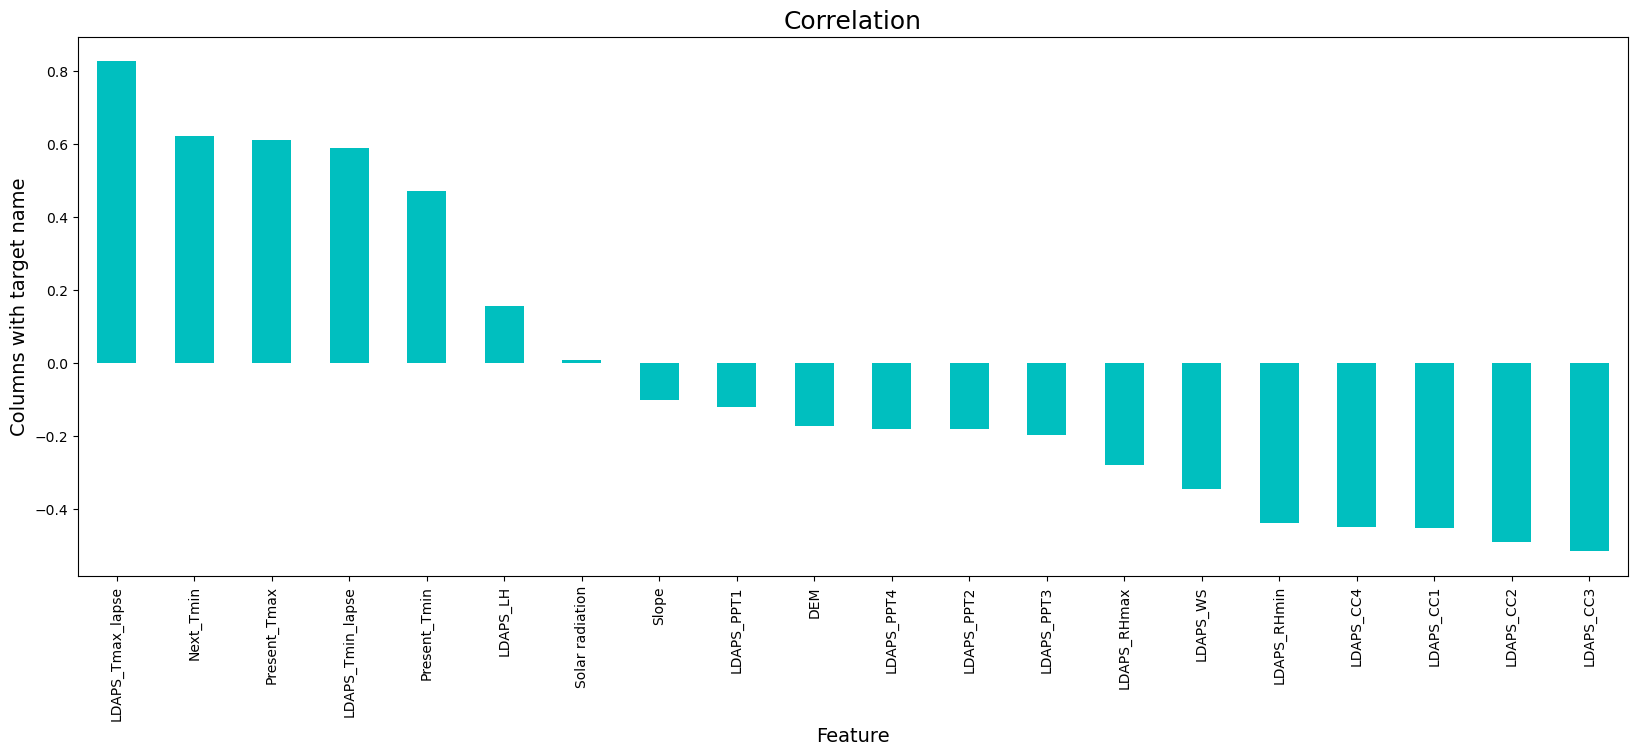

In [43]:
plt.figure(figsize=(20,7))
data.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Here we can see a storng correltion between of LDAPS_Tmax_lapse, Present_Tmax,LDAPS_Tmin_lapse, Present_Tmin, LDAPS_LH and Solar radiation are having positve correlation,  other Fetaures having negative correlation.

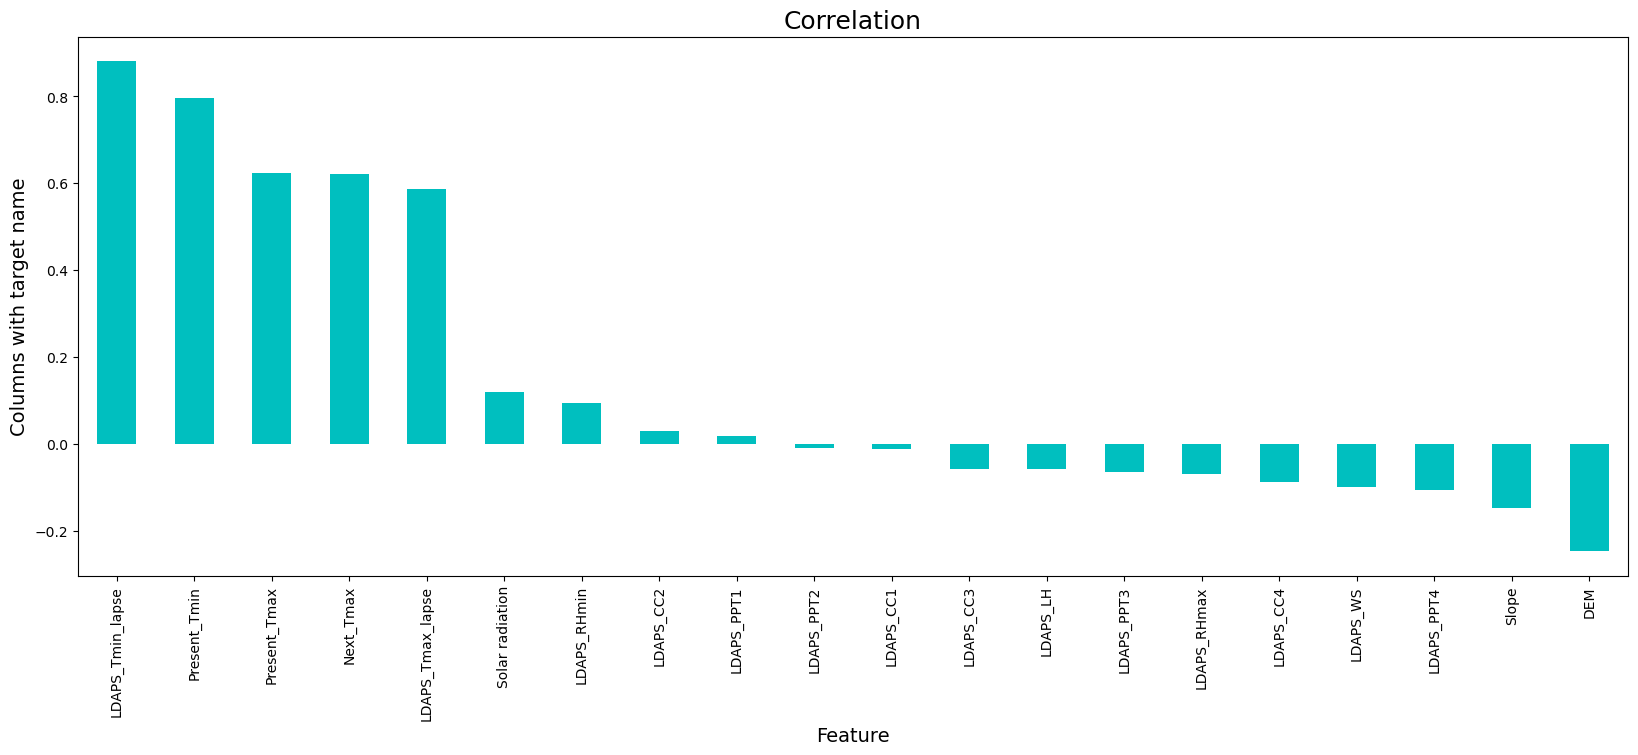

In [44]:
plt.figure(figsize=(20,7))
data.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Here we can see a storng correltion between of LDAPS_Tmin_lapse, Present_Tmin,Present_Tmax, LDAPS_Tmax_lapse, Present_Tmin, LDAPS_LH, LDAPS_CC2, LDAPS_PPT1 , and Solar radiation are having positve correlation, other Fetaures having negative correlation.

## Checking Outliers

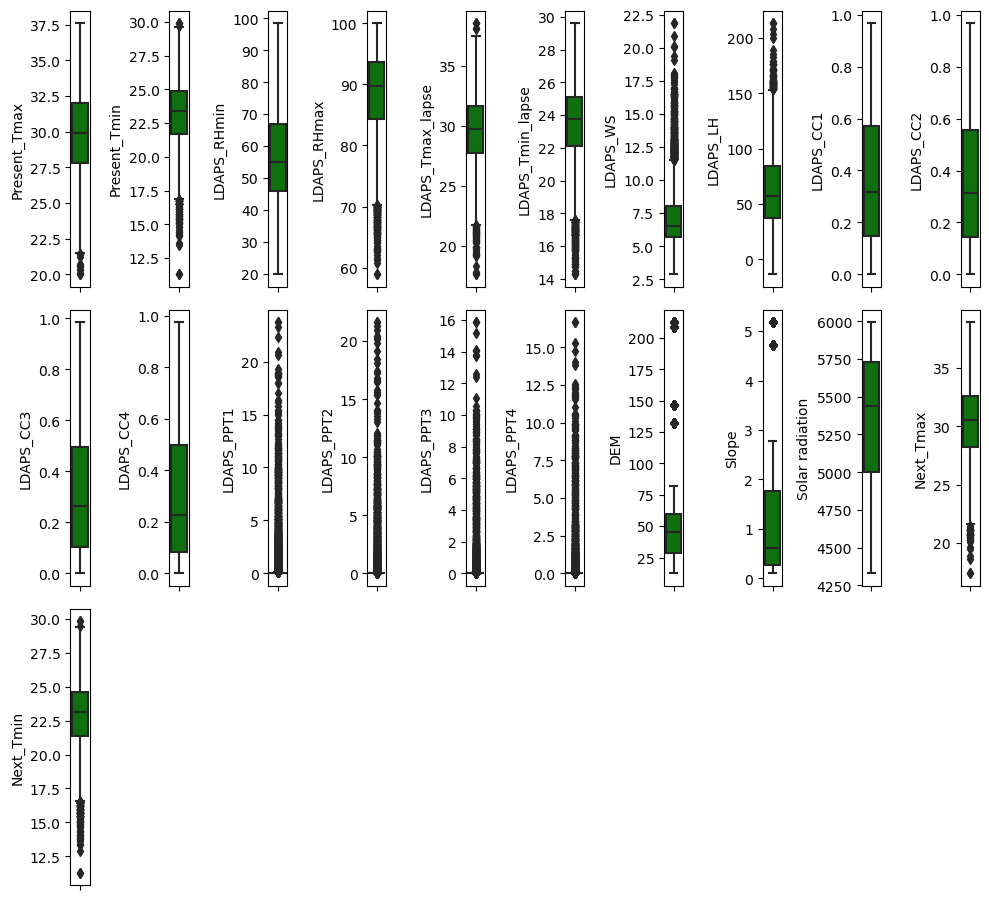

In [45]:
collist=data.columns.values
ncol= 10
nrows= 10
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=data[collist[i]],color='green', orient='x')
    plt.tight_layout()

Here we can see Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS	LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, and LDAPS_CC4 having many outliers, in next step we remove outliers.

## Removing Outliers

In [46]:
from scipy.stats import zscore
z= np.abs(zscore(data))
z

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0         0.361725      0.760169     0.103649     0.381088          0.525183   
1         0.720675      0.676937     0.306866     0.309610          0.080598   
2         0.619200      0.030530     0.551637     0.616784          0.162639   
3         0.754500      0.072146     0.102559     1.130923          0.030795   
4         0.551550      0.552090     0.038955     0.246800          0.170621   
...            ...           ...          ...          ...               ...   
7747      2.188275      2.549645     2.055314     1.329793          1.112358   
7748      2.188275      2.299950     2.240329     1.549810          0.887955   
7749      2.222100      2.424798     2.316209     1.556967          0.571074   
7750      3.304501      4.963357     2.531209     4.114586          4.088135   
7751      2.648700      2.777168     2.862369     1.622186          3.044250   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0             0.217678  0.125893  0.208564   0.514175   0.590909   0.626693   
1             0.222809  0.644345  0.313173   0.546482   0.404498   0.635733   
2             0.450160  0.439018  1.247488   0.608363   0.382312   0.456564   
3             0.080896  0.663593  0.097609   0.581458   0.504833   0.628858   
4             0.012213  0.624511  1.355851   0.830157   0.411413   0.557687   
...                ...       ...       ...        ...        ...        ...   
7747          2.030596  0.434099  0.286208   1.294796   1.069285   1.275578   
7748          2.048660  0.252892  0.453062   1.272440   1.092930   1.275578   
7749          2.138873  0.090494  1.589557   1.222369   1.151699   1.275578   
7750          3.959959  1.936712  2.265567   1.409773   1.384807   1.275578   
7751          2.615464  6.792373  4.497062   2.293157   2.385618   2.672339   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       DEM  \
0      0.661828    0.302656    0.273714    0.238242    0.222227  2.772243   
1      0.674470    0.302656    0.273714    0.238242    0.222227  0.315157   
2      0.617605    0.302656    0.273714    0.238242    0.222227  0.526218   
3      0.648714    0.302656    0.273714    0.238242    0.222227  0.297588   
4      0.507430    0.302656    0.273714    0.238242    0.222227  0.494322   
...         ...         ...         ...         ...         ...       ...   
7747   1.178933    0.302656    0.273714    0.238242    0.222227  0.852681   
7748   1.178933    0.302656    0.273714    0.238242    0.222227  0.821213   
7749   1.175789    0.302656    0.273714    0.238242    0.222227  0.779043   
7750   1.178933    0.302656    0.273714    0.238242    0.222227  0.911963   
7751   2.670715   11.933093   12.047815   13.460269   13.650667  2.772243   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     1.115004         1.517935   0.376530   0.697829  
1     0.542158         1.229950   0.071845   0.174298  
2     0.723133         1.216534   0.264006   0.389506  
3     0.932424         1.201176   0.456167   0.550592  
4     0.548433         1.207205   0.296033   0.174298  
...        ...              ...        ...        ...  
7747  0.803915         2.093040   0.632744   1.946251  
7748  0.755095         2.104553   0.536664   1.664349  
7749  0.719338         2.074325   0.792878   2.228152  
7750  0.845455         2.358212   4.123667   4.684723  
7751  2.861435         1.517935   2.762098   2.765534  

[7752 rows x 21 columns]

## Position of Outliers

In [47]:
threshold = 3
print(np.where(z > 3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 6, 13, 13, ..., 13, 14, 15], dtype=int64))


In [48]:
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(7752, 21)
(6894, 21)


In [49]:
Loss_percentage=(7752-6894)/7752*100
print(Loss_percentage)

11.06811145510836


Here we can see we have data loss percentage 11.06 which greater that 10 percent, we will contineu with our orignal data. 

In [50]:
data.skew()

Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

We can see data is having skewness in LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope, LDAPS_RHmax, LDAPS_WS and LDAPS_LH.  

## Removing Skewness

In [51]:
from sklearn.preprocessing import power_transform

In [52]:
X=power_transform(data, method='yeo-johnson')

In [53]:
X= pd.DataFrame(data=X, columns= ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'])

### Scaling the data Using StandardScaler.

In [54]:
# Dividing into Feature and Target data
x=X.drop(['Next_Tmax', 'Next_Tmin'],axis=1)
ymax=data['Next_Tmax']
ymin= data['Next_Tmin']

In [55]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

In [56]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [59]:
calc_vif(x)

variables  VIF FACTOR
0       Present_Tmax   25.827466
1       Present_Tmin   44.449922
2        LDAPS_RHmin   59.950102
3        LDAPS_RHmax   17.287826
4   LDAPS_Tmax_lapse   59.483051
5   LDAPS_Tmin_lapse   57.120538
6           LDAPS_WS   19.034263
7           LDAPS_LH   59.546094
8          LDAPS_CC1   17.910615
9          LDAPS_CC2   20.309537
10         LDAPS_CC3   17.526463
11         LDAPS_CC4    9.723241
12        LDAPS_PPT1    2.941523
13        LDAPS_PPT2    2.663910
14        LDAPS_PPT3    2.205350
15        LDAPS_PPT4    2.132337
16               DEM   13.267132
17             Slope    8.516408
18   Solar radiation    5.545723

We can see few columns having higher VIF  we will drop one by one and check at every step.

In [60]:
x.drop(['LDAPS_RHmin'],axis=1, inplace= True)

In [61]:
calc_vif(x)

variables  VIF FACTOR
0       Present_Tmax   25.047381
1       Present_Tmin   44.053799
2        LDAPS_RHmax   13.966267
3   LDAPS_Tmax_lapse   43.308967
4   LDAPS_Tmin_lapse   42.267337
5           LDAPS_WS   18.663838
6           LDAPS_LH   48.401234
7          LDAPS_CC1   17.786326
8          LDAPS_CC2   19.778993
9          LDAPS_CC3   15.991539
10         LDAPS_CC4    9.690095
11        LDAPS_PPT1    2.941486
12        LDAPS_PPT2    2.663137
13        LDAPS_PPT3    2.198450
14        LDAPS_PPT4    2.127218
15               DEM   13.250938
16             Slope    8.494823
17   Solar radiation    5.292753

In [62]:
x.drop(['LDAPS_LH'],axis=1, inplace= True)

In [63]:
calc_vif(x)

variables  VIF FACTOR
0       Present_Tmax   22.009314
1       Present_Tmin   43.638648
2        LDAPS_RHmax    9.896363
3   LDAPS_Tmax_lapse   33.384581
4   LDAPS_Tmin_lapse   35.498577
5           LDAPS_WS   16.226480
6          LDAPS_CC1   17.338326
7          LDAPS_CC2   19.709221
8          LDAPS_CC3   15.926216
9          LDAPS_CC4    9.618795
10        LDAPS_PPT1    2.872805
11        LDAPS_PPT2    2.647179
12        LDAPS_PPT3    2.197161
13        LDAPS_PPT4    2.115690
14               DEM   13.123303
15             Slope    8.435583
16   Solar radiation    5.283695

In [64]:
x.drop(['Present_Tmin'],axis=1, inplace= True)

In [65]:
calc_vif(x)

variables  VIF FACTOR
0       Present_Tmax   18.243249
1        LDAPS_RHmax    9.224051
2   LDAPS_Tmax_lapse   32.729169
3   LDAPS_Tmin_lapse   29.255799
4           LDAPS_WS   15.671996
5          LDAPS_CC1   17.087160
6          LDAPS_CC2   19.705087
7          LDAPS_CC3   15.924862
8          LDAPS_CC4    9.575833
9         LDAPS_PPT1    2.871436
10        LDAPS_PPT2    2.646866
11        LDAPS_PPT3    2.195655
12        LDAPS_PPT4    2.087196
13               DEM   12.770108
14             Slope    8.402964
15   Solar radiation    5.170875

In [66]:
x.drop(['LDAPS_Tmax_lapse'],axis=1, inplace= True)

In [67]:
calc_vif(x)

variables  VIF FACTOR
0       Present_Tmax   16.387528
1        LDAPS_RHmax    9.032540
2   LDAPS_Tmin_lapse   18.300666
3           LDAPS_WS   14.758883
4          LDAPS_CC1   16.947070
5          LDAPS_CC2   18.696732
6          LDAPS_CC3   15.527766
7          LDAPS_CC4    9.523547
8         LDAPS_PPT1    2.847818
9         LDAPS_PPT2    2.583490
10        LDAPS_PPT3    2.195131
11        LDAPS_PPT4    2.086576
12               DEM   12.463192
13             Slope    8.380505
14   Solar radiation    5.001748

In [68]:
x.drop(['LDAPS_CC2'],axis=1, inplace= True)

In [69]:
calc_vif(x)

variables  VIF FACTOR
0       Present_Tmax   16.367212
1        LDAPS_RHmax    8.905184
2   LDAPS_Tmin_lapse   18.199125
3           LDAPS_WS   14.756111
4          LDAPS_CC1   11.315758
5          LDAPS_CC3   12.959446
6          LDAPS_CC4    9.523513
7         LDAPS_PPT1    2.724140
8         LDAPS_PPT2    2.214950
9         LDAPS_PPT3    2.194886
10        LDAPS_PPT4    2.058092
11               DEM   12.459962
12             Slope    8.378153
13   Solar radiation    4.993929

In [70]:
x.drop(['LDAPS_Tmin_lapse'],axis=1, inplace= True)

In [71]:
calc_vif(x)

variables  VIF FACTOR
0      Present_Tmax    6.525007
1       LDAPS_RHmax    8.885355
2          LDAPS_WS   14.694059
3         LDAPS_CC1   10.144945
4         LDAPS_CC3   12.951297
5         LDAPS_CC4    9.517273
6        LDAPS_PPT1    2.661220
7        LDAPS_PPT2    2.212382
8        LDAPS_PPT3    2.194857
9        LDAPS_PPT4    2.013666
10              DEM   12.459748
11            Slope    8.337138
12  Solar radiation    4.953635

In [72]:
x.drop(['LDAPS_WS'],axis=1, inplace= True)

In [73]:
calc_vif(x)

variables  VIF FACTOR
0      Present_Tmax    4.760964
1       LDAPS_RHmax    8.506020
2         LDAPS_CC1    9.570874
3         LDAPS_CC3   12.904517
4         LDAPS_CC4    9.423493
5        LDAPS_PPT1    2.654948
6        LDAPS_PPT2    2.211501
7        LDAPS_PPT3    2.194650
8        LDAPS_PPT4    1.989337
9               DEM   11.880327
10            Slope    8.335969
11  Solar radiation    4.716739

In [74]:
x.drop(['LDAPS_CC3'],axis=1, inplace= True)

In [75]:
calc_vif(x)

variables  VIF FACTOR
0      Present_Tmax    4.709926
1       LDAPS_RHmax    8.501329
2         LDAPS_CC1    8.362328
3         LDAPS_CC4    4.806686
4        LDAPS_PPT1    2.580740
5        LDAPS_PPT2    2.190570
6        LDAPS_PPT3    1.970139
7        LDAPS_PPT4    1.976206
8               DEM   11.876357
9             Slope    8.335862
10  Solar radiation    4.716691

we can contineu with this data we almost removed colliear data. 

### Model Building

In [76]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [77]:
# Chosing Best Random State
lr=LinearRegression()
for i in range(0, 1000):
    x_train, x_test, y_train, y_test= train_test_split(x,ymin,random_state= i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)== round(r2_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",r2_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", r2_score(y_test,pred_test)*100)

At Random state  24 The Model performing Well
At Random State 24
Training Accuracy score is- 49.9806309896102
Testing Accuracy Score is- 49.95838870690673
At Random state  69 The Model performing Well
At Random State 69
Training Accuracy score is- 49.98006656112673
Testing Accuracy Score is- 49.968835426813776
At Random state  123 The Model performing Well
At Random State 123
Training Accuracy score is- 49.98798771287265
Testing Accuracy Score is- 49.954206949160216
At Random state  221 The Model performing Well
At Random State 221
Training Accuracy score is- 49.97960570739527
Testing Accuracy Score is- 49.96315226310065
At Random state  271 The Model performing Well
At Random State 271
Training Accuracy score is- 49.96639765298322
Testing Accuracy Score is- 49.969536004883594
At Random state  457 The Model performing Well
At Random State 457
Training Accuracy score is- 49.98400436023959
Testing Accuracy Score is- 49.95627782921195
At Random state  512 The Model performing Well
At Rand

At Random State 730  
Training Accuracy score is- 49.98034980817665  
Testing Accuracy Score is- 49.98088251854958  

In [78]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,ymin,random_state=730,test_size=0.20)
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(r2_score(y_test_b,lr_pred))

0.49980882518549574


### Cross Validation of Model

In [79]:
test_accuracy= r2_score(y_test_b,lr_pred)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,ymin,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 32.20003528244762 and Accuracy score is 49.98088251854958
At cross fold 3 the Cross Val score is 28.598946596153578 and Accuracy score is 49.98088251854958
At cross fold 4 the Cross Val score is 34.361348994390774 and Accuracy score is 49.98088251854958
At cross fold 5 the Cross Val score is 31.224040068745722 and Accuracy score is 49.98088251854958
At cross fold 6 the Cross Val score is 25.08492806443933 and Accuracy score is 49.98088251854958
At cross fold 7 the Cross Val score is 28.473288360767025 and Accuracy score is 49.98088251854958
At cross fold 8 the Cross Val score is 28.83520902957708 and Accuracy score is 49.98088251854958
At cross fold 9 the Cross Val score is 5.2325640391162525 and Accuracy score is 49.98088251854958


At cross fold 4 the Cross Val score is 34.361348994390816 and Accuracy score is 49.68377098184198  
Diffrence in both is very high lets try Another models.

In [80]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,lr_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,lr_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,lr_pred)))

Error:
Mean Absolute Error: 1.3874195047445157
Mean Squared Error: 3.095911072015181
Root Mean Square Error: 1.7595201254930792


## 2. Lasso

In [81]:
ls=Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,ymin,cv=4,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100) 

R2 score: -0.07227224685255607
Cross val Score : -13.067561296868346


In [82]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 1.9571028715548988
Mean Squared Error: 6.1939288666107135
Root Mean Square Error: 2.4887605080864477


Model performance is very poor. 

### 3. Ridge

In [83]:
rd= Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,ymin,cv=4, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  49.97298740041812
Cross val Score 34.352674067162525


In [84]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 1.3874666492826269
Mean Squared Error: 3.0963997368471246
Root Mean Square Error: 1.7596589831121041


r2 score:  49.68355091643556  
Cross val Score 34.35267406716226   
Diffrence in both the score is high, we can check for other model. 

### 3. Decision TreeRegressor

In [85]:
dt=DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,ymin,cv=4,scoring='r2')
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 63.573268485417714
Cross Val Score: 3.7537960450988312


In [86]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Error:
Mean Absolute Error: 1.0362991618310768
Mean Squared Error: 2.25461637653127
Root Mean Square Error: 1.5015380036919712


Here we can see cross validation score is very less, modle perfomance is poor. 

### 4. KNeighborsRegressor

In [87]:
kn=KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score:', kn_score*100)

kn_cvscore=cross_val_score(kn,x,ymin, cv=4, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 74.0261198832138
Cross val Score : 12.105820977006374


In [88]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 0.9577176015473888
Mean Squared Error: 1.6076417794970985
Root Mean Square Error: 1.2679281444534223


R2 Score : 70.95223826553689   
Cross val Score : 12.105820977006374   
Both the score having big diffrence, lets try another model

### 5. Ensemble Techniques

In [89]:
rf=RandomForestRegressor()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,ymin, cv=4, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 83.70050486873157
Cross val Score : 35.69989797103102


In [90]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 0.7301263700838174
Mean Squared Error: 1.008850015473888
Root Mean Square Error: 1.0044152604744154


R2 score: 83.15889887303645  
Cross val Score : 35.85381346133614   
Both the score having big diffrence, lets try another model. 

### 7. GradientBoostingRegressor

In [91]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, gb_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,ymin, cv=4, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 83.70050486873157
Cross val Score : 43.89132985509846


In [92]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))

Error:
Mean Absolute Error: 0.7301263700838174
Mean Squared Error: 1.008850015473888
Root Mean Square Error: 1.0044152604744154


R2 score: 83.15889887303645   
Cross val Score : 43.88866341977301   
Both the score having big diffrence , still Ridge and Liear model performing well.

### Lets Try Hyper Parameter Tuning

We will try Hyper para mere Tuning on Ridge,GradientBoostingRegressor

In [93]:
# Hyperparameter tunnign wih Lasso 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'random_state': list(range(0,10)), 'max_iter': [500,1000,1500,2000, 2500], 'selection':['cyclic',' random']}
ls=Lasso()
clf=GridSearchCV(ls, parameters)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'alpha': 0.0001, 'max_iter': 500, 'random_state': 0, 'selection': 'cyclic'}


In [94]:
ls=Lasso(alpha=0.001,max_iter=500, random_state=0, selection='cyclic')
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,ymin,cv=4, scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100)

R2 score: 49.938860366554636
Cross val Score : 34.41188427734936


In [89]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['lad', 'huber'],'criterion':['friedman_mse', 'mae'], 'learning_rate':[0.001,0.01,0.1], 'n_estimators':[10,20,100]}
gb=GradientBoostingRegressor()
gbclf=GridSearchCV(gb, param_grid=parameters, n_jobs=-1)
gbclf.fit(x_train_b, y_train_b)
print(gbclf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 100}


In [95]:
gb=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.1, loss='huber', n_estimators= 100)
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,ymin, cv=4, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 83.70050486873157
Cross val Score : 44.405284197501146


R2 score: 49.657411146208844 and Cross val Score : 34.41188427734937 lasso is still our best model. 

### Lets Apply model for Tmax 

In [96]:
lr=LinearRegression()
for i in range(0, 1000):
    x_train, x_test, y_train, y_test= train_test_split(x,ymax,random_state= i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)== round(r2_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",r2_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", r2_score(y_test,pred_test)*100)

At Random state  55 The Model performing Well
At Random State 55
Training Accuracy score is- 55.33406247637108
Testing Accuracy Score is- 55.32201939804171
At Random state  71 The Model performing Well
At Random State 71
Training Accuracy score is- 55.32004151967762
Testing Accuracy Score is- 55.29814430956898
At Random state  87 The Model performing Well
At Random State 87
Training Accuracy score is- 55.345462672035175
Testing Accuracy Score is- 55.32408121522169
At Random state  121 The Model performing Well
At Random State 121
Training Accuracy score is- 55.32615997222086
Testing Accuracy Score is- 55.324944189525695
At Random state  146 The Model performing Well
At Random State 146
Training Accuracy score is- 55.327825512302844
Testing Accuracy Score is- 55.32307111783774
At Random state  164 The Model performing Well
At Random State 164
Training Accuracy score is- 55.31233933763387
Testing Accuracy Score is- 55.340157601047494
At Random state  199 The Model performing Well
At Rand

At Random State 948  
Training Accuracy score is- 55.332913024174935  
Testing Accuracy Score is- 55.33706254663344   

At Random Stat 609 we are getting very less diffrence in training and testing accuracy.

In [97]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,ymax,random_state=948,test_size=0.20)

In [98]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(r2_score(y_test_b,lr_pred))

0.5533706254663346


### Cross Validation of Model

In [99]:
test_accuracy= r2_score(y_test_b,lr_pred)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,ymax,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 39.30344097014061 and Accuracy score is 55.33706254663346
At cross fold 3 the Cross Val score is 46.801456759608435 and Accuracy score is 55.33706254663346
At cross fold 4 the Cross Val score is 45.608498581335475 and Accuracy score is 55.33706254663346
At cross fold 5 the Cross Val score is 45.78724894172768 and Accuracy score is 55.33706254663346
At cross fold 6 the Cross Val score is 44.825705064435375 and Accuracy score is 55.33706254663346
At cross fold 7 the Cross Val score is 44.26478781937721 and Accuracy score is 55.33706254663346
At cross fold 8 the Cross Val score is 42.36238848824787 and Accuracy score is 55.33706254663346
At cross fold 9 the Cross Val score is 30.502371745194797 and Accuracy score is 55.33706254663346


At cross fold 3 the Cross Val score is 46.80145675960843 and Accuracy score is 55.67482378632032  
Both the score having less diffrence, model performance if good as compare to other. 
lets try other. 

In [100]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,lr_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,lr_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,lr_pred)))

Error:
Mean Absolute Error: 1.6293918573291502
Mean Squared Error: 4.3856253324093615
Root Mean Square Error: 2.094188466306068


## 2. Lasso

In [102]:
ls=Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,ymax,cv=3,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100) 

R2 score: -0.030113307369461495
Cross val Score : -5.1904906422113095


In [103]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 2.567981766215407
Mean Squared Error: 9.822340937217307
Root Mean Square Error: 3.134061412483378


R2 score: -0.030113307369461495
Cross val Score : -5.1904906422113095  
Model performance is poor.

## 3. Ridge

In [104]:
rd= Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,ymax,cv=3, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  55.356096172596935
Cross val Score 46.79985538631463


In [105]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 1.629166578630883
Mean Squared Error: 4.383756347587659
Root Mean Square Error: 2.0937421874690445


r2 score:  55.356096172596935  
Cross val Score 46.79985538631473   
both the score are good and having very less diffrence, score is similer to linear model.  
Lets try another model. 

## 3. Decision TreeRegressor

In [106]:
dt=DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,ymax,cv=3,scoring='r2')
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 71.03684029823117
Cross Val Score: 11.4045546942188


In [107]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Error:
Mean Absolute Error: 1.145003223726628
Mean Squared Error: 2.844003868471954
Root Mean Square Error: 1.6864174656566961


R2 Score:  69.56217190013541
Cross Val Score: 8.949928227825776   Mpdel performance is less lets try anaojer model.  

## 4. KNeighborsRegressor

In [108]:
kn=KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score: 0', kn_score*100)

kn_cvscore=cross_val_score(kn,x,ymax, cv=3, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 0 74.0641843540368
Cross val Score : 24.923357359212424


In [109]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 1.2155254674403613
Mean Squared Error: 2.546737330754352
Root Mean Square Error: 1.5958500339174582


R2 Score: 0 74.0641843540368
Cross val Score : 24.923357359212424   
Both score having huge diffrence, Model performnace is less.  


## 5. Ensemble Techniques

In [110]:
rf=RandomForestRegressor()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,ymax, cv=3, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 86.80615408791417
Cross val Score : 43.09838656715112


In [111]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 0.8254100580270795
Mean Squared Error: 1.295554393939394
Root Mean Square Error: 1.1382242283220798


R2 score: 86.66200007467259
Cross val Score : 42.64002471666921 Very big diffrence in both the score . Ridge and linear model are still best.

### 7. GradientBoostingRegressor

In [112]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, gb_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,ymax, cv=3, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 86.80615408791417
Cross val Score : 48.88637264746175


In [113]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))

Error:
Mean Absolute Error: 0.8254100580270795
Mean Squared Error: 1.295554393939394
Root Mean Square Error: 1.1382242283220798


R2 score: 86.66200007467259  
Cross val Score : 48.71517655713888  Diffrence is still high, 
Ridge and linear are still best. 

## Lets Try Hyper Parameter Tuning

We will try Hyper Parameter Tuning on Ridge and GradientBoostingRegressor  
lets see the performnace.  

In [114]:
parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'fit_intercept': [True,False], 'normalize':[True, False], 'copy_X': [True , False], 'tol':[0.0001,0.001,0.01,0.1,1,10]}
rd=Ridge()
rdclf=GridSearchCV(rd, parameters)
rdclf.fit(x_train_b, y_train_b)
print(rdclf.best_params_)


{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'tol': 0.0001}


In [115]:
rd= Ridge(alpha= 0.001, copy_X= True, fit_intercept= True, normalize= True, tol= 0.0001)
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,ymax,cv=3)
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  55.340194494282215
Cross val Score 46.80896590328255


We can see Both the score are almost same as earlier.  Linear  Model still working good.  

In [118]:
gb=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.1, loss='huber', n_estimators= 100)
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,ymax, cv=3, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 86.80615408791417
Cross val Score : 47.99328583787912


### Here we can see our linear model is performing well for Tmax. Lest save the model 

## Model for Tmin

In [119]:
import pickle
filename='Temperature Forecast Project using ML_lsmin.pkl'
pickle.dump(ls,open(filename,'wb'))

In [120]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(ls.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

original  predicted
0         32.8  30.286551
1         32.6  30.286551
2         30.5  30.286551
3         31.6  30.286551
4         29.7  30.286551
...        ...        ...
1546      28.6  30.286551
1547      25.4  30.286551
1548      27.6  30.286551
1549      32.3  30.286551
1550      29.2  30.286551

[1551 rows x 2 columns]

## Model for TMax

In [121]:
import pickle
filename='Temperature Forecast Project using ML_lrMax.pkl'
pickle.dump(lr,open(filename,'wb'))

In [122]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(lr.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

original  predicted
0         32.8  30.173872
1         32.6  33.275172
2         30.5  30.239947
3         31.6  32.830702
4         29.7  31.648675
...        ...        ...
1546      28.6  34.231935
1547      25.4  28.893476
1548      27.6  29.087668
1549      32.3  31.041835
1550      29.2  28.837300

[1551 rows x 2 columns]